# 09/10 Reprise - mise en place du framework ML

Faussement difficile, seulement enfoncer un blocage. Just do it.

Framework général ML et approche systématique
* étapes standard -> librairie des fonctions standard réutilisables (soit dans pepper_commons, soit dans un nouveau fichier pepper_ml_commons)
* bien outiller et packager le travail par sous-ensembles, c'est-à-dire sous ensembles des variables et targets spécifiques intermédiaires (passer d'une vision naïve n - 1 pour une vision plus arborescente de l'objectif)
* bien distinguer et systématiser les différentes approches : le but est de tester TOUS les algorithmes de régression et de classification et les mettre en compétition
* pour chacun, viser à faire le plus rapidement possible le b aba : à savoir GridSearch, score, confusion, ROC, etc, en fait tout ce qui a été abordé dans le cours.
* puis, une fois que toutes les bases ont été posées, c'est au cas pas cas, revenir sur la théorie et sur la doc, pour tenter d'aller le plus loin possible, et surtout pour discuter des avantages / inconvénients de chaque algorithme par rapport au problème à résoudre.

# Plan détaillé de travail:

Faire ou réutiliser les fonctions pour charger tel ou tel sous-ensemble.

✔ Commencer par me réapproprier ce que j'ai déjà développé, en particulier les fonctions de seattle_commons, en particulier clean_dataset et toutes les getters de colonnes propres (au sens dont les valeurs d'intensité sont recalculées pour évacuer l'erreur de troncature)

✔ En phase de démarrage, ne pas rentrer dans ces détails, et prendre toutes les données.
MAIS, de suite, je vire les multi-outliers => rouvrir la GSheet.

✔ Faire au moins la séparation entre résidentiel et non résidentiel, i.e. partant des données propres, extraire uniquement le non-résidentiel : prédictions et perfs sur tout, sur le résidentiel, sur le non résidentiel. Nommage : data, family, business.

✔ En revanche, je n'utilise (cf. infer) que les données d'intensité, les classes, et je normalise par le log les données liées à la taille (cf. getters de seattle_commons).

J'intègre également les données d'EnergySCORE (en phase 2)

✔ Numérisation d'abord naïve des catégories
(puis on étudiera en phase 2 plus en détails LabelEncoder, OrdinalEncoder, OneHotEncoder (le SKL du jour))

✔ Normalisation évidemment

✔ Séparation évidemment

Puis une première passe où je teste les résultats (R2) de chacun des algos vus en cours, avec paramètres par défaut. Je m'offre même d'aller un cran plus loin avec ceux que je n'ai pas encore étudiés : une section par algo. Faire que ce soit le plus dense possible (navigabilité) :
* Méthodes de régression linéaires
    1. régression linéaire oridinaire
    2. régression linéaire d'arête (*ridge, réduction de Tikhonov*)
    3. lasso
    4. elasticNet
* Méthodes linéaires de classification
    1. régression logistique
    2. SVM
    3. SVM multiclasse
* Méthodes non linéaires



Partant des premiers résultats, attaquer les gridSearch des meilleurs paramètres : noter mes meilleurs résultats sur papier.

Me limiter à 2h et passer par exemple sur Maths, saisir des tâches, revue des tâches milestone.

# Commons

In [1]:
from pepper_commons import *
from seattle_commons import *

✔ _data loaded
✔ struct loaded


# Préparation des données

## Chargement des données et suppression des outliers

In [7]:
from pepper_commons import get_data
from seattle_commons import clean_dataset, drop_my_outliers
data = get_data()
data, not_compliant, outliers = clean_dataset(data)  # drop outliers identified by Seattle
data, my_outliers = drop_my_outliers(data)           # drop my own outliers (18)


Removal of outliers


BuildingType    PrimaryPropertyType  \
id                                                   
350          NonResidential           Large Office   
539          NonResidential           Retail Store   
608          NonResidential           Large Office   
704          NonResidential           Large Office   
19708  Multifamily HR (10+)  High-Rise Multifamily   

                     PropertyName                Address  ZipCode  \
id                                                                  
350    Second And Spring Building     1100 Second Avenue  98101.0   
539             University Center  4501 Roosevelt Way NE  98105.0   
608        411 1ST AVE  S (ID608)          411 1ST AVE S  98104.0   
704          401 Elliott Ave West    401 Elliot Ave West  98119.0   
19708                   Bay Vista           2821 2nd Ave  98121.0   

      TaxParcelIdentificationNumber  CouncilDistrictCode  \
id                                                         
350                      0942000045                    7   
539                      5335200380                    4   
608                      5247800200                    2   
704                      7666202110                    7   
19708                    0586400000                    7   

                Neighborhood  Latitude  Longitude  ...  SiteEnergyUseWN(kBtu)  \
id                                                 ...                          
350                 DOWNTOWN  47.60642 -122.33581  ...           4.165040e+07   
539                NORTHEAST  47.66178 -122.31812  ...           3.189628e+05   
608                 DOWNTOWN  47.59878 -122.33458  ...           1.134876e+07   
704    MAGNOLIA / QUEEN ANNE  47.62235 -122.36378  ...           2.713719e+07   
19708               DOWNTOWN  47.61706 -122.35141  ...           2.589126e+06   

       SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
id                                                           
350               0.0      1.166315e+07         39794668.0   
539               0.0      9.348260e+04           318963.0   
608               0.0      4.715030e+05          1608768.0   
704               0.0      7.953454e+06         27137187.0   
19708             0.0      6.265616e+05          2137828.0   

       NaturalGas(therms)  NaturalGas(kBtu) ComplianceStatus       Outlier  \
id                                                                           
350          16048.309570         1604831.0    Non-Compliant  High outlier   
539              0.000000               0.0    Non-Compliant   Low outlier   
608           3430.500488          343050.0    Non-Compliant   Low outlier   
704              0.000000               0.0    Non-Compliant  High outlier   
19708         2700.760010          270076.0    Non-Compliant   Low outlier   

       TotalGHGEmissions GHGEmissionsIntensity  
id                                              
350               362.66                  2.10  
539                 2.22                  0.03  
608                29.43                  0.19  
704               189.18                  1.46  
19708              29.25                  0.17  

[5 rows x 40 columns]

⇒ 32 outliers + Outlier column dropped

Removal of not compliant


BuildingType PrimaryPropertyType            PropertyName  \
id                                                                  
28  SPS-District K-12         K-12 School  Graham Hill Elementary   
34  SPS-District K-12         K-12 School          Meany Building   
36  SPS-District K-12         K-12 School      Jane Addams Middle   
37  SPS-District K-12         K-12 School     John Hay Elementary   
51  SPS-District K-12         K-12 School         Eckstein Middle   

                 Address  ZipCode TaxParcelIdentificationNumber  \
id                                                                
28    5149 S. Graham St.  98118.0                    1102000138   
34  301/300 21st Ave. E.  98112.0                    0688000090   
36  11051 34th Ave. N.E.  98125.0                    0752000170   
37      201 Garfield St.  98109.0                    0809000005   
51    3003 N.E. 75th St.  98115.0                    0425049022   

    CouncilDistrictCode           Neighborhood  Latitude  Longitude  ...  \
id                                                                   ...   
28                    2              SOUTHEAST  47.54576 -122.26853  ...   
34                    3                Central  47.62266 -122.30547  ...   
36                    5                  NORTH  47.70994 -122.29301  ...   
37                    7  MAGNOLIA / QUEEN ANNE  47.63290 -122.35172  ...   
51                    4              NORTHEAST  47.68252 -122.29498  ...   

    SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
id                                                               
28            1539478.5              1713623.5             0.0   
34                  0.0                    0.0             0.0   
36            6779173.0              7800349.5             0.0   
37                  0.0                    0.0             0.0   
51            6399127.5              7329817.5             0.0   

    Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms) NaturalGas(kBtu)  \
id                                                                             
28       274605.9063           936955.0         6025.229004         602523.0   
34            0.0000                0.0            0.000000              0.0   
36       570809.1875          1947601.0        48315.718750        4831572.0   
37       438691.6875          1496816.0            0.000000              0.0   
51       468840.5000          1599684.0        47994.433590        4799443.0   

                ComplianceStatus  TotalGHGEmissions GHGEmissionsIntensity  
id                                                                         
28  Error - Correct Default Data              38.53                  0.69  
34                  Missing Data               0.00                  0.00  
36  Error - Correct Default Data             270.18                  1.68  
37                  Missing Data              10.43                  0.20  
51  Error - Correct Default Data             266.05                  1.52  

[5 rows x 39 columns]

⇒ 133 not compliant + ComplianceStatus column dropped


## Séparation du résidentiel et du non résidentiel

In [8]:
from seattle_commons import get_family_buildings, get_business_buildings
family = get_family_buildings(data)
business = get_business_buildings(data)

## Composition du.es jeu.x de données pour la modélisation

In [9]:
ml_data = get_ml_data(data)
display(ml_data)

bid  pid         x          y   z   t        asc       s_e       s_i  \
id                                                                            
1        0    7  47.61220 -122.33799  12  89  11.390012  0.000000  1.000000   
2        0    7  47.61317 -122.33393  11  20  11.547964  0.145453  0.854547   
3        0    7  47.61393 -122.33810  41  47  13.770628  0.205748  0.794252   
5        0    7  47.61412 -122.33664  10  90  11.023861  0.000000  1.000000   
8        0    7  47.61375 -122.34047  18  36  12.075850  0.353115  0.646885   
...    ...  ...       ...        ...  ..  ..        ...       ...       ...   
50221    4    3  47.54067 -122.37441   1  34   9.812523  0.000000  1.000000   
50223    4    3  47.59625 -122.32283   1  12   9.680344  0.000000  1.000000   
50224    4    3  47.63644 -122.35784   1  42   9.484709  0.000000  1.000000   
50225    4    5  47.52832 -122.32431   1  27   9.554001  0.000000  1.000000   
50226    4    5  47.53939 -122.29536   1  78   9.812359  0.000000  1.000000   

       s_u_0  ...  s_u_65  s_u_66      ies_wn         ies       ie_wn  \
id            ...                                                       
1        0.0  ...     0.0     0.0  189.000000  182.500000   84.321754   
2        0.0  ...     0.0     0.0  179.399994  176.100006   83.661424   
3        0.0  ...     0.0     0.0  244.100006  241.899994   77.331177   
5        0.0  ...     0.0     0.0  224.000000  216.199997  113.287679   
8        0.0  ...     0.0     0.0  215.600006  211.399994   83.474786   
...      ...  ...     ...     ...         ...         ...         ...   
50221    0.0  ...     0.0     0.0  136.600006  126.000000   56.154215   
50223    0.0  ...     0.0     0.0  118.900002  114.199997   65.856609   
50224    0.0  ...     0.0     0.0  767.799988  744.799988  460.117390   
50225    0.0  ...     0.0     0.0  110.800003  105.300003   55.516723   
50226    0.0  ...     0.0     0.0  123.900002  115.800003   70.857836   

               ie        ie_e       ie_s        ie_g    1000 ih  
id                                                               
1       81.714753   44.621152  22.659633   14.433962   2.826741  
2       80.991184   31.311927   0.000000   49.679258   2.856729  
3       75.919114   51.800174  22.556561    1.562373   2.185188  
5      110.805349   45.155316  36.112953   29.537068   4.671070  
8       80.718795   30.576415   0.000000   50.142374   2.876239  
...           ...         ...        ...         ...        ...  
50221   51.042228   34.629101   0.000000   16.413121   1.113302  
50223   59.392262   24.784128   0.000000   34.608124   2.010625  
50224  438.238048  136.213328   0.000000  302.024706  16.990195  
50225   51.022707   24.740811   0.000000   26.281895   1.567974  
50226   63.144717   23.691217   0.000000   39.453499   2.260379  

[3193 rows x 84 columns]

## Partition et normalisation

* Séparation caractéristiques / étiquettes cibles.
* Séparation jeu de test et jeu d'entraînement.
* Normalisation des données.

Il faut distinguer facilement les blocs de cibles des données structurelles.

Les inputs sont uniquement les données structurelles.

Les cibles sont nombreuses, et il faudra pouvoir facilement changer de cible

données structurelles d'entrée (76) : bid, pid, x, y, z, t, a_scale, ei_ad, u_ad,

targets (8) : ies_wn, ies, ie_wn, ie, ie_e, ie_s, ie_g, _1000_ih

### Séparation des caractéristiques et des étiquettes

In [5]:
from pepper_skl_commons import get_X_Y
X, Y = get_X_Y(ml_data)
display(X)
display(Y)

bid  pid         x          y   z   t        asc       s_e       s_i  \
id                                                                            
1        0    7  47.61220 -122.33799  12  89  11.390012  0.000000  1.000000   
2        0    7  47.61317 -122.33393  11  20  11.547964  0.145453  0.854547   
3        0    7  47.61393 -122.33810  41  47  13.770628  0.205748  0.794252   
5        0    7  47.61412 -122.33664  10  90  11.023861  0.000000  1.000000   
8        0    7  47.61375 -122.34047  18  36  12.075850  0.353115  0.646885   
...    ...  ...       ...        ...  ..  ..        ...       ...       ...   
50221    4    3  47.54067 -122.37441   1  34   9.812523  0.000000  1.000000   
50223    4    3  47.59625 -122.32283   1  12   9.680344  0.000000  1.000000   
50224    4    3  47.63644 -122.35784   1  42   9.484709  0.000000  1.000000   
50225    4    5  47.52832 -122.32431   1  27   9.554001  0.000000  1.000000   
50226    4    5  47.53939 -122.29536   1  78   9.812359  0.000000  1.000000   

       s_u_0  ...  s_u_57  s_u_58  s_u_59  s_u_60  s_u_61  s_u_62  s_u_63  \
id            ...                                                           
1        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
50221    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50223    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50224    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50225    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50226    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       s_u_64  s_u_65  s_u_66  
id                             
1         0.0     0.0     0.0  
2         0.0     0.0     0.0  
3         0.0     0.0     0.0  
5         0.0     0.0     0.0  
8         0.0     0.0     0.0  
...       ...     ...     ...  
50221     0.0     0.0     0.0  
50223     0.0     0.0     0.0  
50224     0.0     0.0     0.0  
50225     0.0     0.0     0.0  
50226     0.0     0.0     0.0  

[3193 rows x 76 columns]

ies_wn         ies       ie_wn          ie        ie_e       ie_s  \
id                                                                             
1      189.000000  182.500000   84.321754   81.714753   44.621152  22.659633   
2      179.399994  176.100006   83.661424   80.991184   31.311927   0.000000   
3      244.100006  241.899994   77.331177   75.919114   51.800174  22.556561   
5      224.000000  216.199997  113.287679  110.805349   45.155316  36.112953   
8      215.600006  211.399994   83.474786   80.718795   30.576415   0.000000   
...           ...         ...         ...         ...         ...        ...   
50221  136.600006  126.000000   56.154215   51.042228   34.629101   0.000000   
50223  118.900002  114.199997   65.856609   59.392262   24.784128   0.000000   
50224  767.799988  744.799988  460.117390  438.238048  136.213328   0.000000   
50225  110.800003  105.300003   55.516723   51.022707   24.740811   0.000000   
50226  123.900002  115.800003   70.857836   63.144717   23.691217   0.000000   

             ie_g    1000 ih  
id                            
1       14.433962   2.826741  
2       49.679258   2.856729  
3        1.562373   2.185188  
5       29.537068   4.671070  
8       50.142374   2.876239  
...           ...        ...  
50221   16.413121   1.113302  
50223   34.608124   2.010625  
50224  302.024706  16.990195  
50225   26.281895   1.567974  
50226   39.453499   2.260379  

[3193 rows x 8 columns]

### Séparation des jeux d'entraînement et de test

In [6]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.3) # 30 % pour test
display(X_train)
display(Y_train)
display(X_test)
display(Y_test)

bid  pid         x          y   z    t        asc       s_e       s_i  \
id                                                                             
22395    2    2  47.55609 -122.28651   3   47  10.316127  0.000000  1.000000   
25547    1    1  47.60038 -122.33517   5  102  10.658059  0.000000  1.000000   
411      0    0  47.60991 -122.33687  10  106  11.779228  0.000000  1.000000   
868      0    3  47.59394 -122.32452   2    8  10.856226  0.000000  1.000000   
616      0    0  47.59858 -122.33198   7  109  11.986548  0.000000  1.000000   
...    ...  ...       ...        ...  ..  ...        ...       ...       ...   
89       0   10  47.61244 -122.32140   3   51  12.095219  0.000000  1.000000   
23028    2    5  47.61181 -122.34417   3  115  10.694306  0.000000  1.000000   
762      0    9  47.60925 -122.33734   3   92  11.258743  0.000000  1.000000   
21425    0    3  47.61974 -122.35110   1   54  11.956296  0.000000  1.000000   
49893    1    1  47.61499 -122.31795   7    2  11.543455  0.032978  0.967022   

          s_u_0  ...  s_u_57  s_u_58  s_u_59  s_u_60  s_u_61  s_u_62  s_u_63  \
id               ...                                                           
22395  1.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25547  0.595782  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
411    0.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
868    0.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
616    0.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...  ...     ...     ...     ...     ...     ...     ...     ...   
89     0.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
23028  0.476147  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
762    0.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
21425  0.000000  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
49893  0.597304  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       s_u_64  s_u_65  s_u_66  
id                             
22395     0.0     0.0     0.0  
25547     0.0     0.0     0.0  
411       0.0     0.0     0.0  
868       0.0     0.0     0.0  
616       0.0     0.0     0.0  
...       ...     ...     ...  
89        0.0     0.0     0.0  
23028     0.0     0.0     0.0  
762       0.0     0.0     0.0  
21425     0.0     0.0     0.0  
49893     0.0     0.0     0.0  

[2235 rows x 76 columns]

ies_wn         ies       ie_wn          ie        ie_e      ie_s  \
id                                                                            
22395  109.599998  102.699997   34.890778   32.697488   32.697478  0.000000   
25547  141.300003  138.500000   43.075493   41.482332   18.648869  0.000000   
411    205.399994  204.100006   90.353398   89.272333   52.462176  4.834990   
868    117.199997  117.400002   37.323330   37.384548   37.384546  0.000000   
616     69.699997   67.900002   28.034525   27.003285   18.769965  2.162211   
...           ...         ...         ...         ...         ...       ...   
89     210.300003  213.399994   92.326360   93.294686   55.227435  0.000000   
23028   92.199997   85.000000   28.772634   26.526681   26.526664  0.000000   
762    333.000000  333.000000  100.602224  100.602224  100.600245  0.000000   
21425  330.799988  317.600006  120.977618  113.437646   94.987336  0.000000   
49893  115.699997  109.800003   33.915104   32.442609   17.729030  0.000000   

            ie_g   1000 ih  
id                          
22395   0.000000  0.228025  
25547  22.833474  1.342691  
411    31.975167  2.437152  
868     0.000000  0.260529  
616     6.071105  0.620189  
...          ...       ...  
89     38.067246  2.406739  
23028   0.000000  0.185017  
762     0.001973  0.701438  
21425  18.450303  1.642094  
49893  14.713579  0.905044  

[2235 rows x 8 columns]

bid  pid         x          y   z    t        asc  s_e  s_i     s_u_0  \
id                                                                             
23288    2    2  47.60733 -122.32727   4   96  10.122623  0.0  1.0  1.000000   
328      0    0  47.61316 -122.33430  33   40  13.581554  0.0  1.0  0.000000   
22934    2    2  47.61967 -122.32700   3  110  10.108874  0.0  1.0  0.823901   
417      0    0  47.60987 -122.33824  10   89  11.782135  0.0  1.0  0.000000   
21539    1    1  47.61868 -122.34266   6    8  11.008148  0.0  1.0  1.016831   
...    ...  ...       ...        ...  ..  ...        ...  ...  ...       ...   
23006    2    2  47.71095 -122.32100   3   40  10.097738  0.0  1.0  1.000000   
27607    2    2  47.70986 -122.33227   4   45  10.175574  0.0  1.0  1.000000   
21097    0    9  47.61165 -122.34011   2  100  10.162770  0.0  1.0  0.000000   
24077    2    2  47.69694 -122.31729   4   23  10.180740  0.0  1.0  0.549526   
26121    2    2  47.61316 -122.32468   3   92  10.232503  0.0  1.0  1.000000   

       ...  s_u_57  s_u_58  s_u_59  s_u_60  s_u_61  s_u_62  s_u_63  s_u_64  \
id     ...                                                                   
23288  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
328    ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
22934  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
417    ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
21539  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...    ...     ...     ...     ...     ...     ...     ...     ...     ...   
23006  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
27607  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
21097  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
24077  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
26121  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       s_u_65  s_u_66  
id                     
23288     0.0     0.0  
328       0.0     0.0  
22934     0.0     0.0  
417       0.0     0.0  
21539     0.0     0.0  
...       ...     ...  
23006     0.0     0.0  
27607     0.0     0.0  
21097     0.0     0.0  
24077     0.0     0.0  
26121     0.0     0.0  

[958 rows x 76 columns]

ies_wn         ies      ie_wn         ie       ie_e  ie_s  \
id                                                                     
23288  112.099998  103.800003  83.120040  75.191913  11.886546   0.0   
328    195.899994  189.500000  53.358122  51.614807  51.604553   0.0   
22934   98.500000   88.199997  34.212276  31.301104  19.056270   0.0   
417    184.800003  179.600006  54.726559  53.189040  53.189032   0.0   
21539   70.400002   69.699997  29.656033  29.064960  19.328689   0.0   
...           ...         ...        ...        ...        ...   ...   
23006   88.300003   82.699997  28.107213  26.326061  26.326046   0.0   
27607   78.000000   74.699997  24.854498  23.778077  23.778053   0.0   
21097   58.000000   58.000000  18.467982  18.467982  18.467978   0.0   
24077  182.199997  178.899994  31.890683  31.315517  31.315498   0.0   
26121   76.000000   71.900002  35.610115  33.871852  17.380649   0.0   

            ie_g   1000 ih  
id                          
23288  63.305382  3.444980  
328     0.680129  0.395883  
22934  12.244829  0.782980  
417     0.000000  0.370837  
21539   9.736267  0.651879  
...          ...       ...  
23006   0.000000  0.183630  
27607   0.000000  0.165689  
21097   0.000000  0.128858  
24077   0.000000  0.218264  
26121  16.491185  0.997050  

[958 rows x 8 columns]

### Normalisation

In [7]:
from pepper_skl_commons import scale_X
_X_train, _X_test = scale_X(X_train, X_test)
display(_X_train)
display(_X_test)

array([[ 0.80686081, -0.57024104, -1.44639922, ...,  0.        ,
         0.02115721,  0.        ],
       [-0.05186962, -0.7786952 , -0.51205043, ...,  0.        ,
         0.02115721,  0.        ],
       [-0.91060006, -0.98714936, -0.31100406, ...,  0.        ,
         0.02115721,  0.        ],
       ...,
       [-0.91060006,  0.88893807, -0.32492752, ...,  0.        ,
         0.02115721,  0.        ],
       [-0.91060006, -0.36178688, -0.10362884, ...,  0.        ,
         0.02115721,  0.        ],
       [-0.05186962, -0.7786952 , -0.20383558, ...,  0.        ,
         0.02115721,  0.        ]])

array([[ 0.80686081, -0.57024104, -0.36543214, ...,  0.        ,
         0.02115721,  0.        ],
       [-0.91060006, -0.98714936, -0.24244155, ...,  0.        ,
         0.02115721,  0.        ],
       [ 0.80686081, -0.57024104, -0.10510557, ...,  0.        ,
         0.02115721,  0.        ],
       ...,
       [-0.91060006,  0.88893807, -0.27429675, ...,  0.        ,
         0.02115721,  0.        ],
       [ 0.80686081, -0.57024104,  1.52499447, ...,  0.        ,
         0.02115721,  0.        ],
       [ 0.80686081, -0.57024104, -0.24244155, ...,  0.        ,
         0.02115721,  0.        ]])

### Tuple pratique

In [8]:
XY = X_train, X_test, Y_train, Y_test
_XY = _X_train, _X_test, Y_train, Y_test

# Méthodes linéaires (première passe rapide)

On commence avec la régression linéaire ordinaire, puis on testera toutes les autres d'abord avec les paramètres par défaut.

On met de suite en place un mécanisme générique de passage à l'échelle qui permet d'appliquer la même méthode à chacune des targets.

Je récupère ce que j'ai déjà fait dans infer. En particulier, je déplace les fonctions dans un nouveau fichier pepper_skl_commons.py.

## Régression linéaire ordinaire


Nb : pour les moindres carrés ordinaires, il n'y a pas d'hyperparamètre.

Performances ($R^2$) de la première itération :

||$ies_{wn}$|$ies$|$ie_{wn}$|$ie$|$ie_e$|$ie_s$|$ie_g$|$1000 ih$|
|-|-|-|-|-|-|-|-|-|
||50|50|48|49|60|-34|20|32|




ORDINARY LINEAR REGRESSION

Estimation of ies_wn
score : 0.5868403936040684
intercept : 140.8440715670575
performances :
	RMSE : 9651.51
	R2 : 0.5


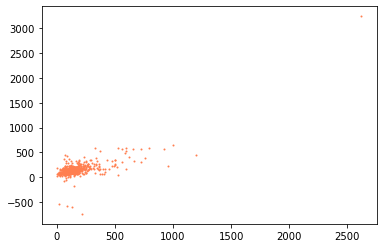


Estimation of ies
score : 0.5923328451732777
intercept : 136.8904250989363
performances :
	RMSE : 9502.75
	R2 : 0.51


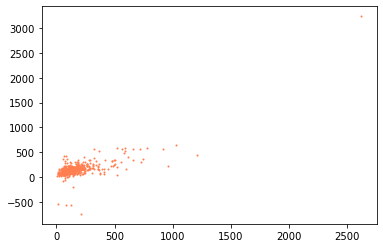


Estimation of ie_wn
score : 0.5703976408613988
intercept : 53.83690178385479
performances :
	RMSE : 2223.27
	R2 : 0.38


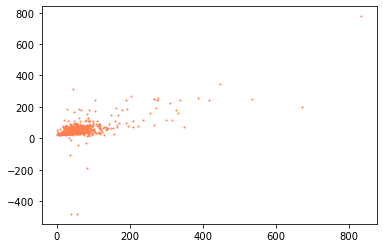


Estimation of ie
score : 0.5738193047435731
intercept : 51.455067654538624
performances :
	RMSE : 2104.99
	R2 : 0.4


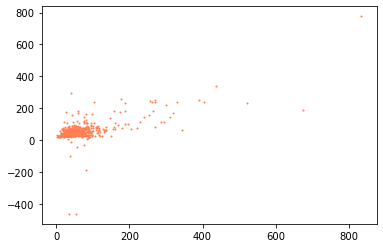


Estimation of ie_e
score : 0.585463608974756
intercept : 34.07392383097557
performances :
	RMSE : 635.12
	R2 : 0.61


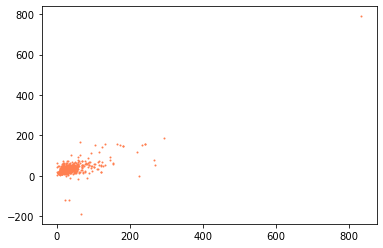


Estimation of ie_s
score : 0.2628832738069976
intercept : 1.1110279471369302
performances :
	RMSE : 110.64
	R2 : 0.01


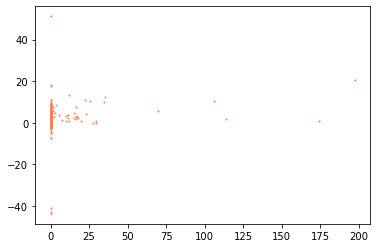


Estimation of ie_g
score : 0.4458686502235337
intercept : 16.12000616387613
performances :
	RMSE : 916.07
	R2 : 0.03


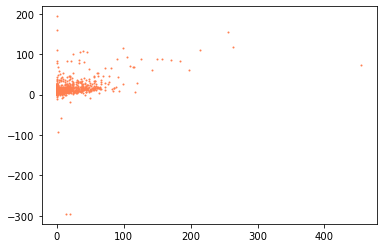


Estimation of 1000 ih
score : 0.49146093931328527
intercept : 1.1794355608980667
performances :
	RMSE : 3.2
	R2 : 0.12


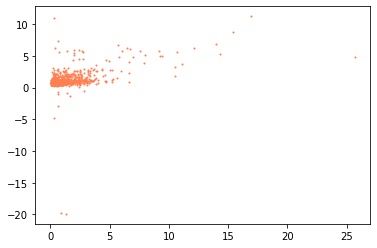

In [9]:
from pepper_skl_commons import ml_main
from sklearn import linear_model
print_title('Ordinary linear regression')
ml_main(_XY, linear_model.LinearRegression)

## Ridge

Régression linéaire d'arête (*ridge, réduction de Tikhonov*).

Performances ($R^2$) de la première itération :

Avec les paramètres par défaut :

||$ies_{wn}$|$ies$|$ie_{wn}$|$ie$|$ie_e$|$ie_s$|$ie_g$|$1000 ih$|
|-|-|-|-|-|-|-|-|-|
|$R^2$|56|57|44|45|53|-20|20|31|

Avec recherche de $\alpha$ optimal pour chaque cible :

||$ies_{wn}$|$ies$|$ie_{wn}$|$ie$|$ie_e$|$ie_s$|$ie_g$|$1000 ih$|
|-|-|-|-|-|-|-|-|-|
|$\alpha$|0,494|0,494|0,075|0,075|0,120|33,93|0,193|0,120|
|$R^2$|58|59|48|49|60|5|20|32|

### Exécution avec les paramètres par défaut


RIDGE

Estimation of ies_wn
score : 0.5868401330718818
intercept : 140.8440715670575
performances :
	RMSE : 9643.89
	R2 : 0.5


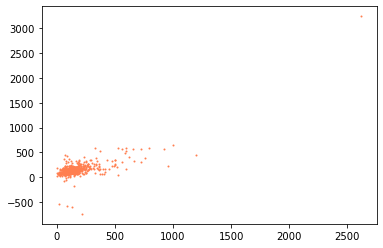


Estimation of ies
score : 0.5923325861793969
intercept : 136.8904250989363
performances :
	RMSE : 9495.43
	R2 : 0.51


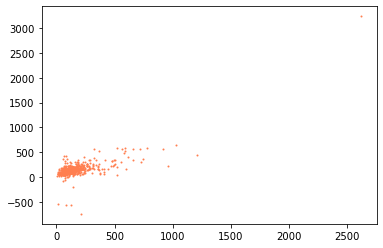


Estimation of ie_wn
score : 0.5703963489468232
intercept : 53.83690178385479
performances :
	RMSE : 2222.48
	R2 : 0.38


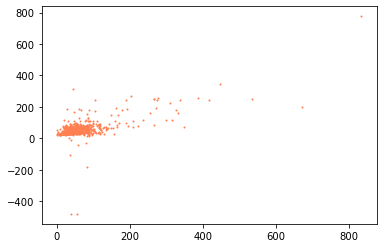


Estimation of ie
score : 0.5738180735093132
intercept : 51.455067654538624
performances :
	RMSE : 2104.3
	R2 : 0.4


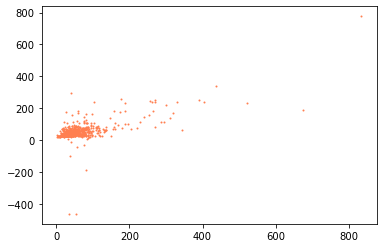


Estimation of ie_e
score : 0.5854622586902372
intercept : 34.07392383097557
performances :
	RMSE : 635.07
	R2 : 0.61


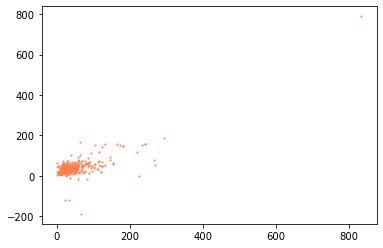


Estimation of ie_s
score : 0.2628830327777696
intercept : 1.1110279471369302
performances :
	RMSE : 110.63
	R2 : 0.01


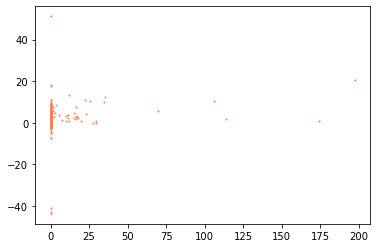


Estimation of ie_g
score : 0.4458682676603811
intercept : 16.12000616387613
performances :
	RMSE : 915.65
	R2 : 0.03


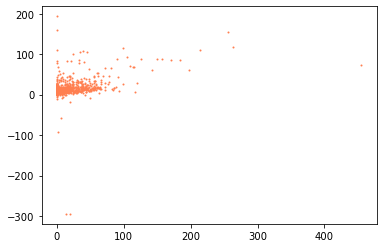


Estimation of 1000 ih
score : 0.491460251462985
intercept : 1.1794355608980667
performances :
	RMSE : 3.2
	R2 : 0.13


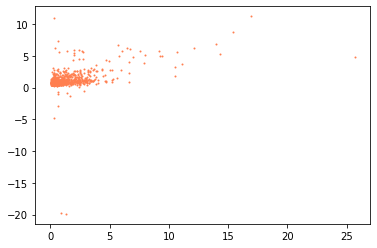

In [10]:
from pepper_skl_commons import ml_main
from sklearn import linear_model
print_title('Ridge')
ml_main(_XY, linear_model.Ridge)

### Recherche des meilleurs paramètres

In [11]:
y_train = Y_train.iloc[:, 0]
y_test = Y_test.iloc[:, 0]

In [12]:
# baseline
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(_X_train, y_train)

# erreur **RSS** (*Residual Sum of Squares*)
import numpy as np
baseline_err = np.mean((lr.predict(_X_test) - y_test) ** 2)
print(baseline_err)

9651.511060296649


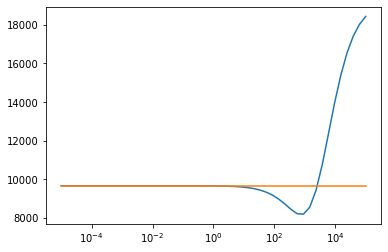

argmin : 39 -> 8181.149096283032 -> alpha : 910.2981779915227


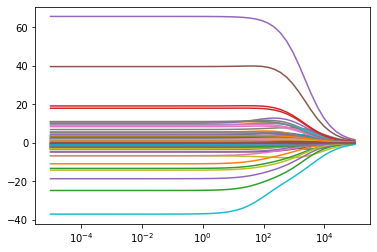

In [13]:
import numpy as np
n_alphas = 50
alphas = np.logspace(-5, 5, 50)   # distribution logarithmique entre 10^-5 et 10^5

ridge = linear_model.Ridge()

coefs, errors = [], []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(_X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(_X_test) - y_test) ** 2))

import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, errors, [10**-5, 10**5], [baseline_err, baseline_err])
ax.set_xscale('log')
plt.show()

# meilleur paramètre
i = np.argmin(errors)
err = errors[i]
print('argmin :', i, '->', err, '-> alpha :', alphas[i])

# chemin de régularisation
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()


Ridge estimation of ies_wn



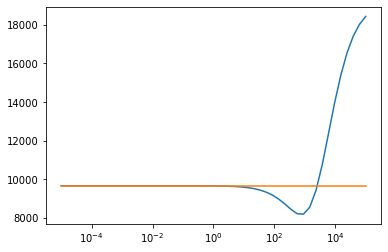

best param : argmin 39 => error 8181.149096283032 => alpha 910.2981779915227


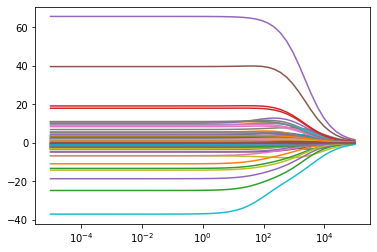

score : 0.5447126425074751
intercept : 140.84407156705777
performances :
	RMSE : 8181.15
	R2 : 0.57


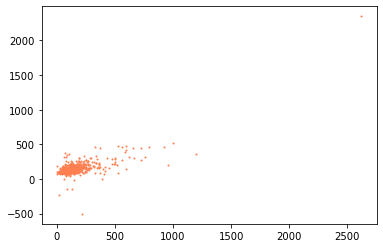


Ridge estimation of ies



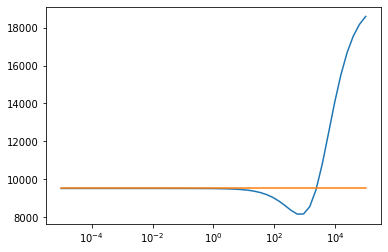

best param : argmin 38 => error 8145.61453699028 => alpha 568.9866029018305


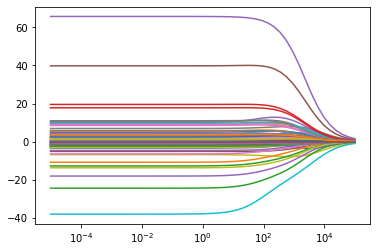

score : 0.5711614618269889
intercept : 136.89042509893648
performances :
	RMSE : 8145.61
	R2 : 0.58


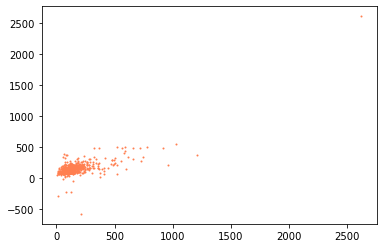


Ridge estimation of ie_wn



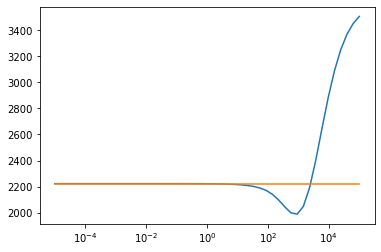

best param : argmin 39 => error 1989.8427823519805 => alpha 910.2981779915227


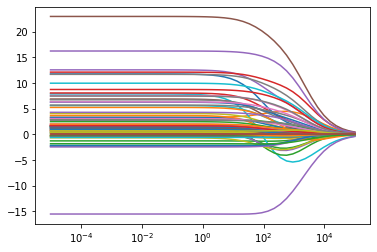

score : 0.5215487295502002
intercept : 53.83690178385483
performances :
	RMSE : 1989.84
	R2 : 0.45


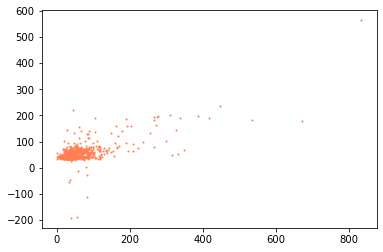


Ridge estimation of ie



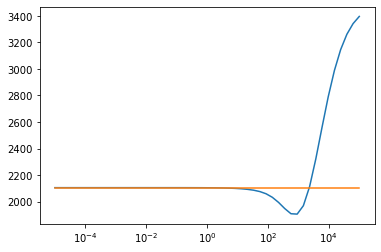

best param : argmin 39 => error 1905.548659362813 => alpha 910.2981779915227


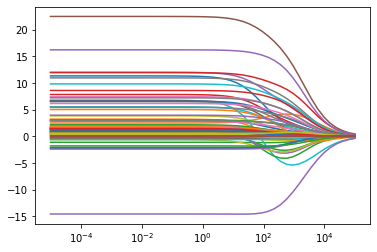

score : 0.525150744201389
intercept : 51.45506765453866
performances :
	RMSE : 1905.55
	R2 : 0.45


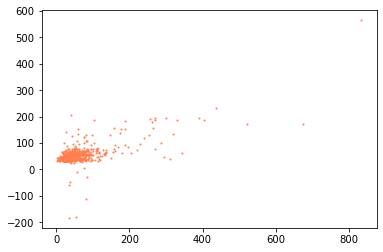


Ridge estimation of ie_e



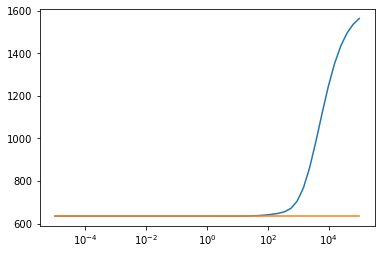

best param : argmin 29 => error 634.9318525137958 => alpha 8.286427728546842


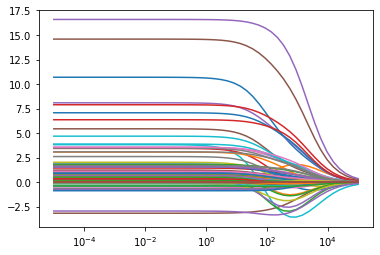

score : 0.5853827104673195
intercept : 34.07392383097558
performances :
	RMSE : 634.93
	R2 : 0.61


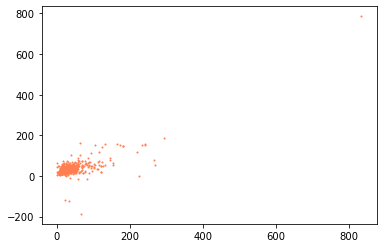


Ridge estimation of ie_s



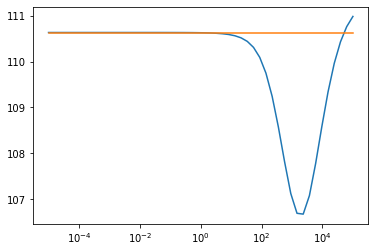

best param : argmin 41 => error 106.67245417685804 => alpha 2329.951810515372


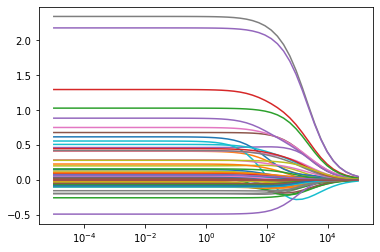

score : 0.19370395979041655
intercept : 1.1110279471369289
performances :
	RMSE : 106.67
	R2 : 0.04


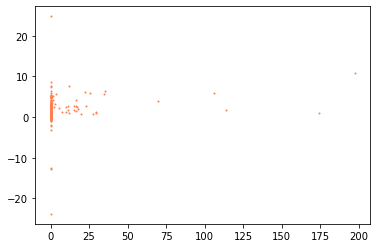


Ridge estimation of ie_g



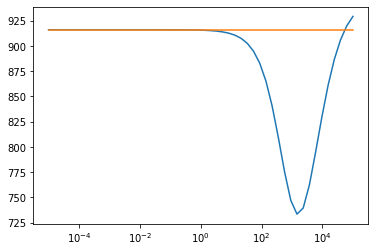

best param : argmin 40 => error 733.5270386820547 => alpha 1456.3484775012444


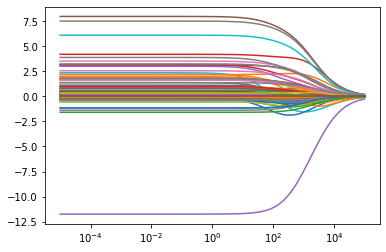

score : 0.3846929021714738
intercept : 16.12000616387609
performances :
	RMSE : 733.53
	R2 : 0.22


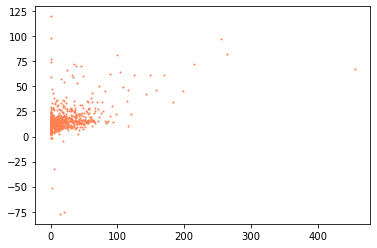


Ridge estimation of 1000 ih



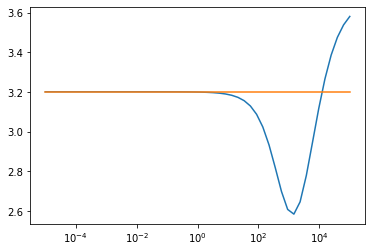

best param : argmin 40 => error 2.583786931766055 => alpha 1456.3484775012444


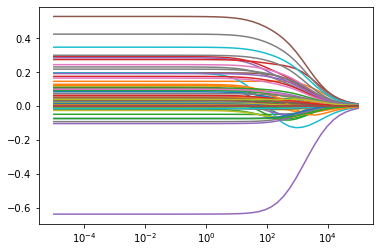

score : 0.4220202234366224
intercept : 1.179435560898065
performances :
	RMSE : 2.58
	R2 : 0.29


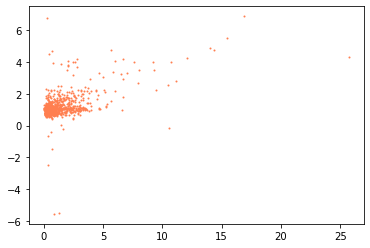

In [14]:
from pepper_skl_commons import ml_main_2_ridge
ml_main_2_ridge(_XY)

## Lasso

Performances ($R^2$) de la première itération :

Avec les paramètres par défaut :

||$ies_{wn}$|$ies$|$ie_{wn}$|$ie$|$ie_e$|$ie_s$|$ie_g$|$1000 ih$|
|-|-|-|-|-|-|-|-|-|
|$R^2$|41|42|13|13|9|0|7|6|

Avec recherche de $\alpha$ optimal pour chaque cible (c'est dans ce genre de moment qu'on se sent très seul et complètement largué) :

||$ies_{wn}$|$ies$|$ie_{wn}$|$ie$|$ie_e$|$ie_s$|$ie_g$|$1000 ih$|
|-|-|-|-|-|-|-|-|-|
|$\alpha$|||||||||
|$R^2$|15|16|26|27|34|-3|4|8|

### Exécution avec les paramètres par défaut


LASSO

Estimation of ies_wn
score : 0.583282750090405
intercept : 140.84407156705788
performances :
	RMSE : 8530.95
	R2 : 0.56


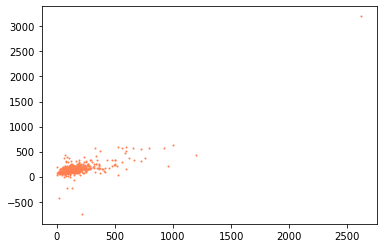


Estimation of ies
score : 0.5888084659025337
intercept : 136.89042509893665
performances :
	RMSE : 8476.89
	R2 : 0.56


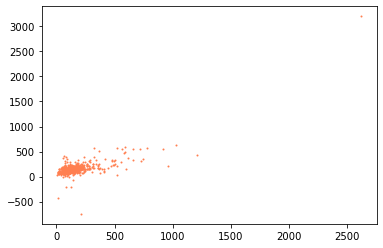


Estimation of ie_wn
score : 0.5460891104411325
intercept : 53.83690178385499
performances :
	RMSE : 1785.48
	R2 : 0.5


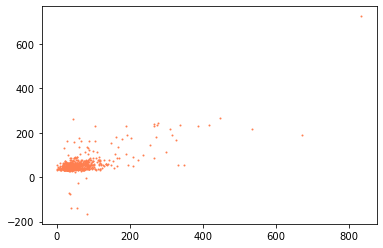


Estimation of ie
score : 0.5495709930625202
intercept : 51.455067654538816
performances :
	RMSE : 1698.87
	R2 : 0.51


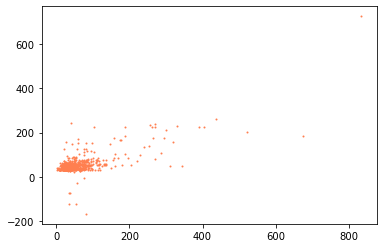


Estimation of ie_e
score : 0.5494908823934044
intercept : 34.07392383097576
performances :
	RMSE : 619.54
	R2 : 0.62


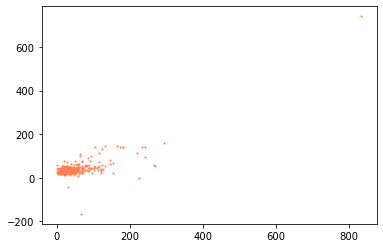


Estimation of ie_s
score : 0.13590600772994577
intercept : 1.1110279471369404
performances :
	RMSE : 111.95
	R2 : -0.01


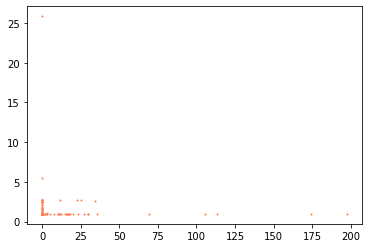


Estimation of ie_g
score : 0.4077576091299192
intercept : 16.12000616387615
performances :
	RMSE : 705.58
	R2 : 0.25


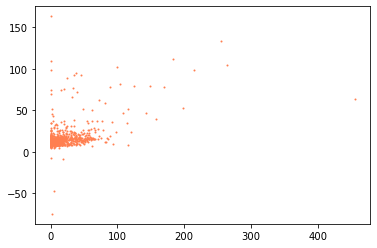


Estimation of 1000 ih
score : 0.0
intercept : 1.1794355608980696
performances :
	RMSE : 3.66
	R2 : -0.0


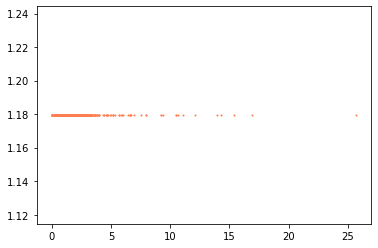

In [15]:
print_title('Lasso')
ml_main(_XY, linear_model.Lasso)

##### [Lasso model selection via information criteria](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars_ic.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-ic-py)

In [24]:
# Scikit-learn provides an estimator called LinearLarsIC that uses either Akaike’s information criterion (AIC
#  or the Bayesian information criterion (BIC) to select the best model. Before fitting this model, we will scale the dataset.

# In the following, we are going to fit two models to compare the values reported by AIC and BIC.

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

lasso_lars_ic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X, y)

n_samples = X.shape[0]

# To be in line with the definition in [ZHT2007], we need to rescale the AIC and the BIC. Indeed,
# Zou et al. are ignoring some constant terms compared to the original definition of AIC derived
# from the maximum log-likelihood of a linear model. You can refer to mathematical detail section for the User Guide.

def zou_et_al_criterion_rescaling(criterion, n_samples, noise_variance):
    """Rescale the information criterion to follow the definition of Zou et al."""
    return criterion - n_samples * np.log(2 * np.pi * noise_variance) - n_samples

import numpy as np

aic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_aic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)

bic_criterion = zou_et_al_criterion_rescaling(
    lasso_lars_ic[-1].criterion_,
    n_samples,
    lasso_lars_ic[-1].noise_variance_,
)

index_alpha_path_bic = np.flatnonzero(
    lasso_lars_ic[-1].alphas_ == lasso_lars_ic[-1].alpha_
)[0]

# Now that we collected the AIC and BIC, we can as well check that the minima of both criteria
# happen at the same alpha. Then, we can simplify the following plot.

index_alpha_path_aic == index_alpha_path_bic

# TODO : manifestement, il y a des problèmes de conditionnemment
# Il faut étudier la manière de le mesurer et de le compenser
# C'est évoqué plusieurs fois dans le cours, mais je n'ai pas vu de développement sur le sujet.


False

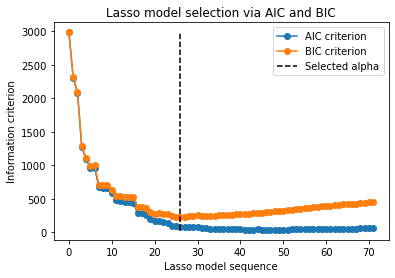

In [25]:
# Finally, we can plot the AIC and BIC criterion and the subsequent selected regularization parameter.

import matplotlib.pyplot as plt

plt.plot(aic_criterion, color="tab:blue", marker="o", label="AIC criterion")
plt.plot(bic_criterion, color="tab:orange", marker="o", label="BIC criterion")
plt.vlines(
    index_alpha_path_bic,
    aic_criterion.min(),
    aic_criterion.max(),
    color="black",
    linestyle="--",
    label="Selected alpha",
)
plt.legend()
plt.ylabel("Information criterion")
plt.xlabel("Lasso model sequence")
_ = plt.title("Lasso model selection via AIC and BIC")

In [26]:
index_alpha_path_bic

26

##### Fonction intégrée sur la base de la seconde méthode

NB > elle ne souffre pas de problèmes de conditionnement.

NB 2 > les performances sous-performent par rapport aux paramètres par défaut.


Lasso estimation of ies_wn



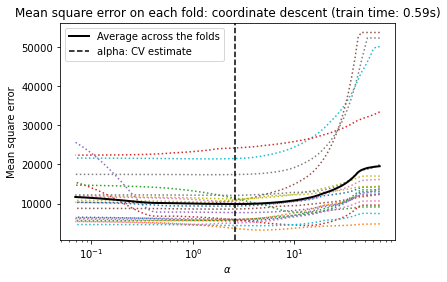

score : 0.5721081033361799
intercept : 140.84407156705817
performances :
	RMSE : 8047.23
	R2 : 0.58


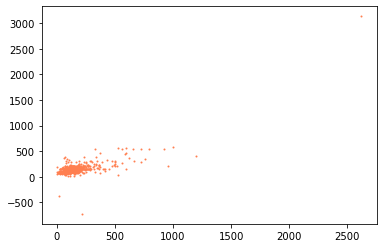


Lasso estimation of ies



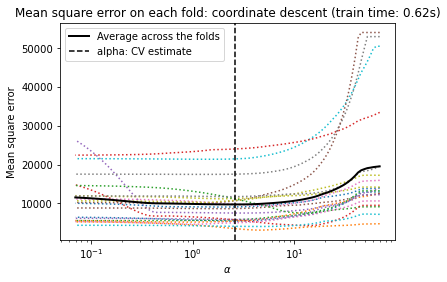

score : 0.5778549763690584
intercept : 136.8904250989369
performances :
	RMSE : 8059.84
	R2 : 0.58


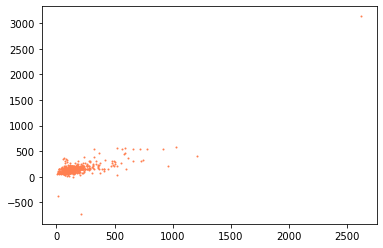


Lasso estimation of ie_wn



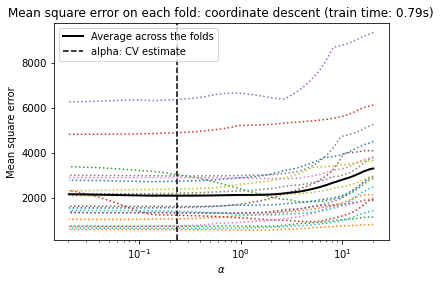

score : 0.5672128512712027
intercept : 53.83690178385486
performances :
	RMSE : 2088.75
	R2 : 0.42


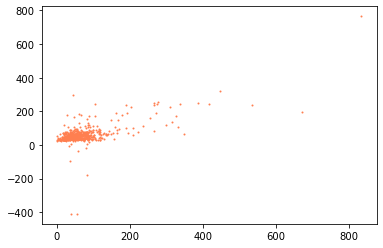


Lasso estimation of ie



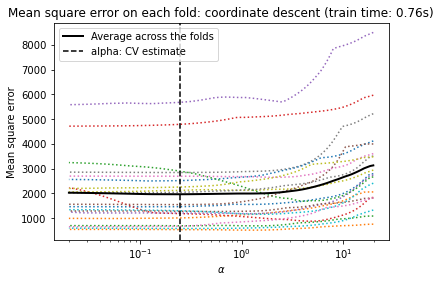

score : 0.5708026796945347
intercept : 51.45506765453869
performances :
	RMSE : 1960.14
	R2 : 0.44


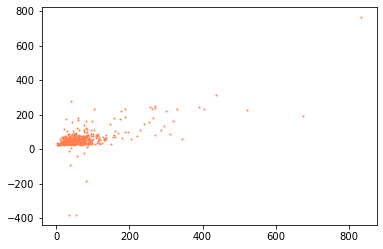


Lasso estimation of ie_e



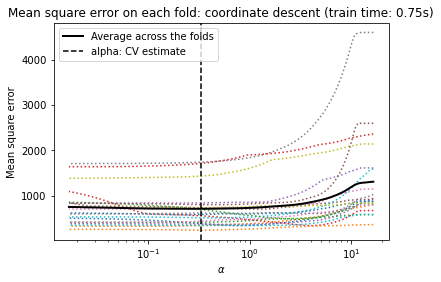

score : 0.5773884102184978
intercept : 34.073923830975666
performances :
	RMSE : 595.52
	R2 : 0.63


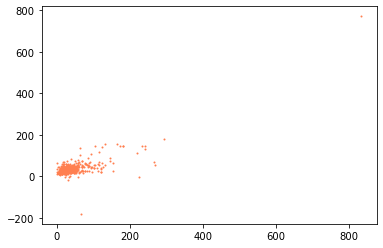


Lasso estimation of ie_s



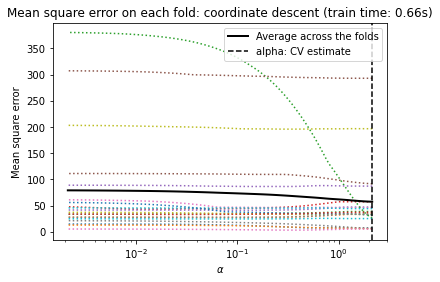

score : 0.0
intercept : 1.1110279471369404
performances :
	RMSE : 111.39
	R2 : -0.0


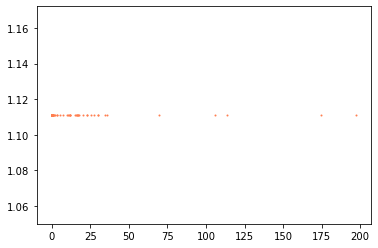


Lasso estimation of ie_g



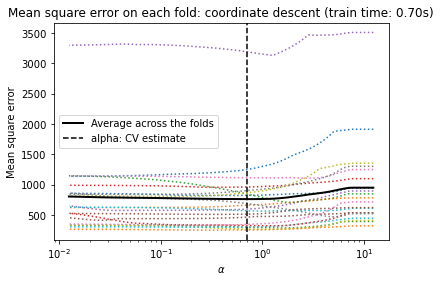

score : 0.42158925311686957
intercept : 16.12000616387615
performances :
	RMSE : 712.77
	R2 : 0.25


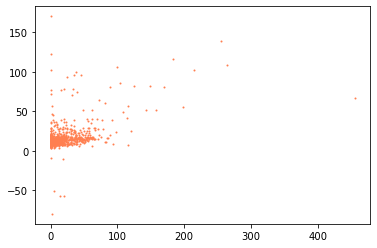


Lasso estimation of 1000 ih



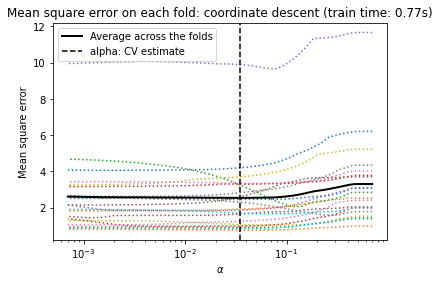

score : 0.4710072446740575
intercept : 1.1794355608980687
performances :
	RMSE : 2.48
	R2 : 0.32


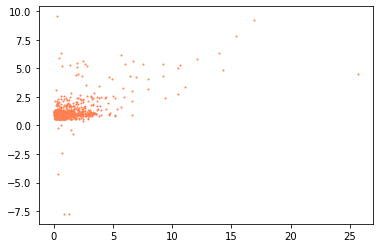

In [28]:
from pepper_skl_commons import ml_main_2_lasso
ml_main_2_lasso(_XY)

## ElasticNet et Lasso

User Guide sample [Lasso and Elastic Net](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py)



Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


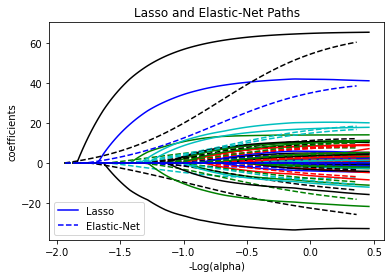

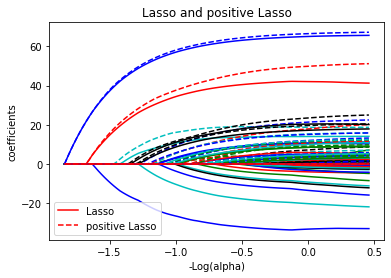

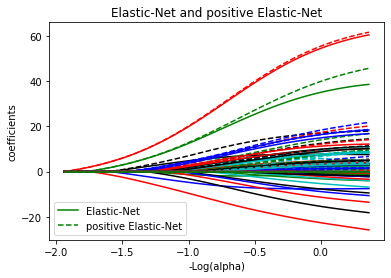

In [29]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


# X, y = datasets.load_diabetes(return_X_y=True)
# X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

X = _X_train
y = Y_train.iloc[:, 0]

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

### Exécution avec les paramètres par défaut


ELASTICNET

Estimation of ies_wn
score : 0.5264106563185018
intercept : 140.8440715670579
performances :
	RMSE : 8218.87
	R2 : 0.57


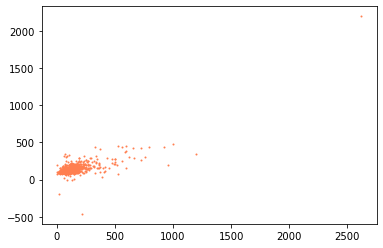


Estimation of ies
score : 0.5319882921996852
intercept : 136.89042509893667
performances :
	RMSE : 8218.3
	R2 : 0.58


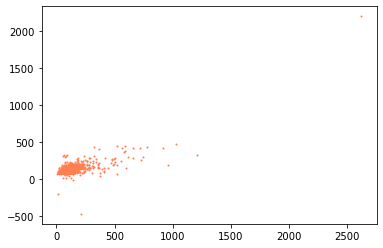


Estimation of ie_wn
score : 0.4936989725641804
intercept : 53.83690178385493
performances :
	RMSE : 1955.57
	R2 : 0.46


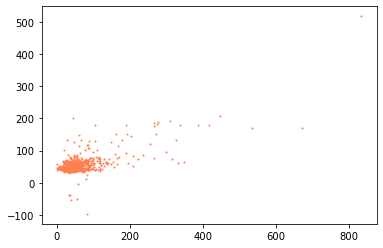


Estimation of ie
score : 0.49687169719521374
intercept : 51.45506765453876
performances :
	RMSE : 1878.11
	R2 : 0.46


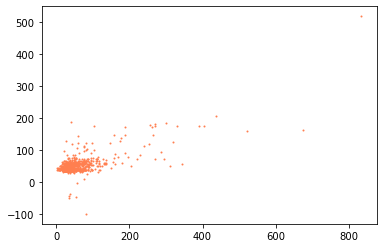


Estimation of ie_e
score : 0.49564086590501455
intercept : 34.073923830975744
performances :
	RMSE : 734.11
	R2 : 0.55


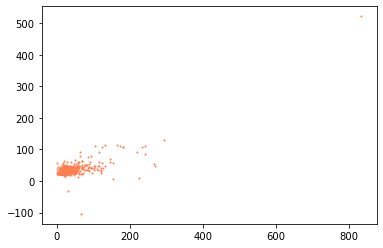


Estimation of ie_s
score : 0.16221500933476762
intercept : 1.1110279471369404
performances :
	RMSE : 111.05
	R2 : 0.0


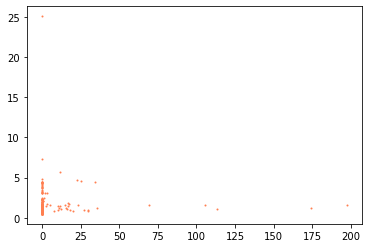


Estimation of ie_g
score : 0.37633166315142974
intercept : 16.12000616387614
performances :
	RMSE : 710.26
	R2 : 0.25


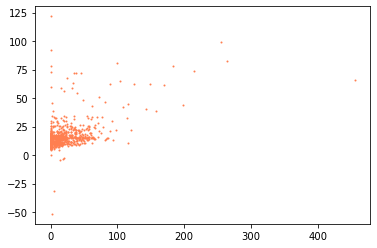


Estimation of 1000 ih
score : 0.050020195656470756
intercept : 1.1794355608980696
performances :
	RMSE : 3.66
	R2 : -0.0


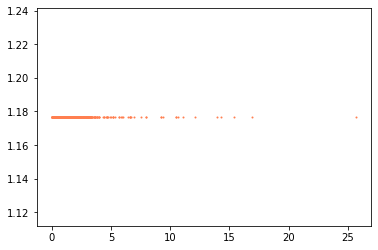

In [30]:
print_title('ElasticNet')
ml_main(_XY, linear_model.ElasticNet)

## LassoLARS


LASSOLARS

Estimation of ies_wn
score : 0.13084770547115998
intercept : 140.84407156705817
performances :
	RMSE : 15066.96
	R2 : 0.21


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


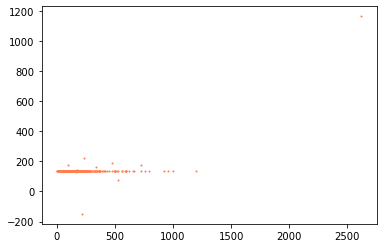


Estimation of ies
score : 0.1326714819379985
intercept : 136.8904250989369
performances :
	RMSE : 15204.36
	R2 : 0.21


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


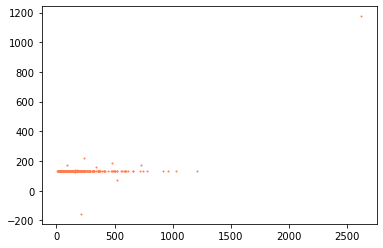


Estimation of ie_wn
score : 0.0
intercept : 53.83690178385502
performances :
	RMSE : 3604.86
	R2 : -0.0


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


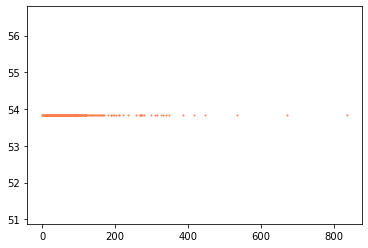


Estimation of ie
score : 0.0
intercept : 51.45506765453884
performances :
	RMSE : 3493.81
	R2 : -0.0


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


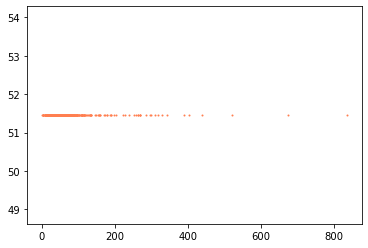


Estimation of ie_e
score : 0.0
intercept : 34.07392383097576
performances :
	RMSE : 1614.63
	R2 : -0.0


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


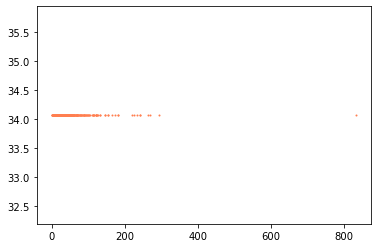


Estimation of ie_s
score : 0.0
intercept : 1.1110279471369404
performances :
	RMSE : 111.39
	R2 : -0.0


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


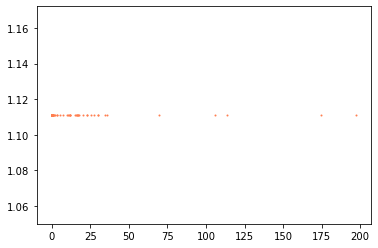


Estimation of ie_g
score : 0.0
intercept : 16.12000616387615
performances :
	RMSE : 946.53
	R2 : -0.0


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


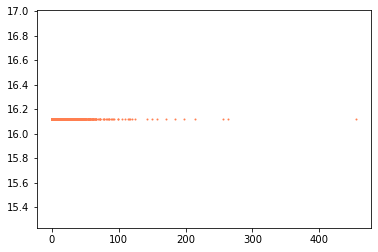


Estimation of 1000 ih
score : 0.0
intercept : 1.1794355608980696
performances :
	RMSE : 3.66
	R2 : -0.0


c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


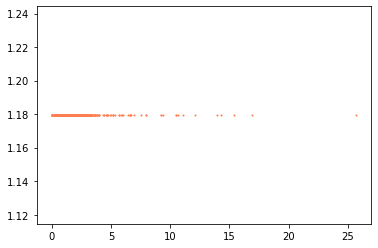

In [31]:
print_title('LassoLARS')
ml_main(_XY, linear_model.LassoLars)

# Milestone 5 - Feature importance

# Milestone 6 - Avec ou sans EnergyScore

Sur la totalité des bâtiments : 3193 = 2390 EnergyScores + 803 NA

Sur le résidentiel : 1655 = 2390 EnergyScores + 257 NA

Sur le non-résidentiel : 1538 = 992 EnergyScores + 546 NA

In [32]:
count_all = data.shape[0]
count_family = family.shape[0]
count_business = business.shape[0]
count_all_es_na = data.ENERGYSTARScore.notna().sum()
count_family_es_na = family.ENERGYSTARScore.notna().sum()
count_business_es_na = business.ENERGYSTARScore.notna().sum()
print('All      : total : ', count_all, 'notna : ', count_all_es_na, 'na :', count_all - count_all_es_na)
print('Family   : total : ', count_family, 'notna : ', count_all_es_na, 'na :', count_family - count_family_es_na)
print('Business : total : ', count_business, 'notna : ', count_business_es_na, 'na :', count_business - count_business_es_na)

All      : total :  3193 notna :  2390 na : 803
Family   : total :  1655 notna :  2390 na : 257
Business : total :  1538 notna :  992 na : 546


Partition avec et sans EnergyScore

In [33]:
all_with_es = data[data.ENERGYSTARScore.notna()]
all_without_es = data[data.ENERGYSTARScore.isna()]
family_with_es = family[family.ENERGYSTARScore.notna()]
family_without_es = family[family.ENERGYSTARScore.isna()]
business_with_es = business[business.ENERGYSTARScore.notna()]
business_without_es = business[business.ENERGYSTARScore.isna()]


Application du meilleur modèle et performances

Ce jour, le 19/10, le meilleur modèle est le Ridge optimisé (pas loin de R2 = 0.6)

Partitions entraînement / test

In [34]:
from sklearn import model_selection

ml_all_with_es = get_ml_data(all_with_es)
ml_all_without_es = get_ml_data(all_without_es)
ml_family_with_es = get_ml_data(family_with_es)
ml_family_without_es = get_ml_data(family_without_es)
ml_business_with_es = get_ml_data(business_with_es)
ml_business_without_es = get_ml_data(business_without_es)


Partition et normalisation

In [35]:
# Partition
from seattle_commons import last_s_u, get_X_Y

Xes, Yes = get_X_Y(ml_all_with_es)
Xnoes, Ynoes = get_X_Y(ml_all_without_es)
Xfes, Yfes = get_X_Y(ml_family_with_es)
Xfnoes, Yfnoes = get_X_Y(ml_family_without_es)
Xbes, Ybes = get_X_Y(ml_business_with_es)
Xbnoes, Ybnoes = get_X_Y(ml_business_without_es)

# Sélection
from sklearn import model_selection
def tt_split(X, Y):
    return model_selection.train_test_split(X, Y, test_size=.3)

XYes = Xes_train, Xes_test, Yes_train, Yes_test = tt_split(Xes, Yes)
XYnoes = Xnoes_train, Xnoes_test, Ynoes_train, Ynoes_test = tt_split(Xnoes, Ynoes)
XYfes = Xfes_train, Xfes_test, Yfes_train, Yfes_test = tt_split(Xfes, Yfes)
XYfnoes = Xfnoes_train, Xfnoes_test, Yfnoes_train, Yfnoes_test = tt_split(Xfnoes, Yfnoes)
XYbes = Xbes_train, Xbes_test, Ybes_train, Ybes_test = tt_split(Xbes, Ybes)
XYbnoes = Xbnoes_train, Xbnoes_test, Ybnoes_train, Ybnoes_test = tt_split(Xbnoes, Ybnoes)

# Normalisation
from seattle_commons import scale_X
_Xes_train, _Xes_test = scale_X(Xes_train, Xes_test)
_Xnoes_train, _Xnoes_test = scale_X(Xnoes_train, Xnoes_test)
_Xfes_train, _Xfes_test = scale_X(Xfes_train, Xfes_test)
_Xfnoes_train, _Xfnoes_test = scale_X(Xfnoes_train, Xfnoes_test)
_Xbes_train, _Xbes_test = scale_X(Xbes_train, Xbes_test)
_Xbnoes_train, _Xbnoes_test = scale_X(Xbnoes_train, Xbnoes_test)

_XYes = _Xes_train, _Xes_test, Yes_train, Yes_test
_XYnoes = _Xnoes_train, _Xnoes_test, Ynoes_train, Ynoes_test
_XYfes = _Xfes_train, _Xfes_test, Yfes_train, Yfes_test
_XYfnoes = _Xfnoes_train, _Xfnoes_test, Yfnoes_train, Yfnoes_test
_XYbes = _Xbes_train, _Xbes_test, Ybes_train, Ybes_test
_XYbnoes = _Xbnoes_train, _Xbnoes_test, Ybnoes_train, Ybnoes_test


Application du meilleur modèle (Ridge au 19/10)

La différence entre avec et sans EnergyScore est significative : 52 % avec, 23 % sans.


ALL, WITH ENERGYSCORE

Ridge estimation of ies_wn



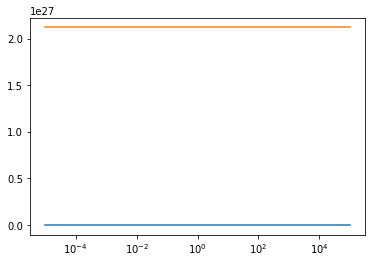

best param : argmin 37 => error 6197.962954765755 => alpha 355.64803062231283


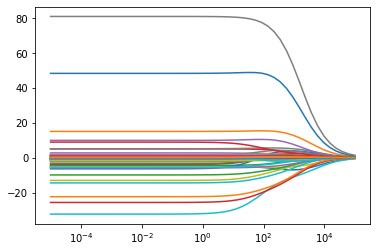

score : 0.7087296429440585
intercept : 129.69210993106748
performances :
	RMSE : 6197.96
	R2 : 0.59


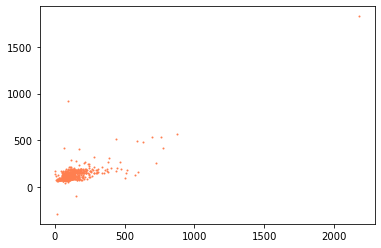


Ridge estimation of ies



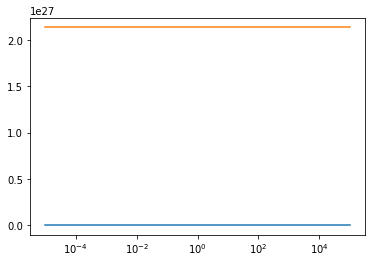

best param : argmin 38 => error 6288.364843824203 => alpha 568.9866029018305


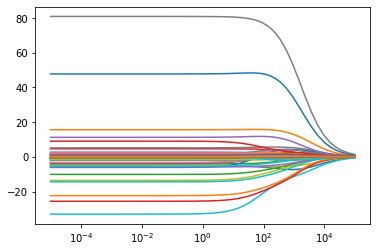

score : 0.6942959499346599
intercept : 125.86359838986054
performances :
	RMSE : 6288.36
	R2 : 0.58


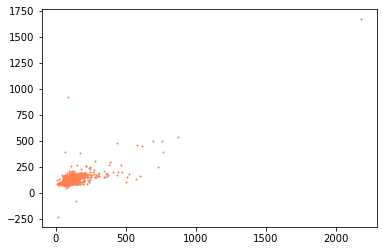


Ridge estimation of ie_wn



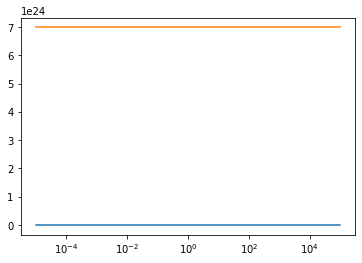

best param : argmin 40 => error 940.3267921085932 => alpha 1456.3484775012444


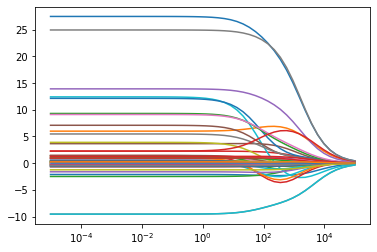

score : 0.6133506573761094
intercept : 48.85444484663969
performances :
	RMSE : 940.33
	R2 : 0.37


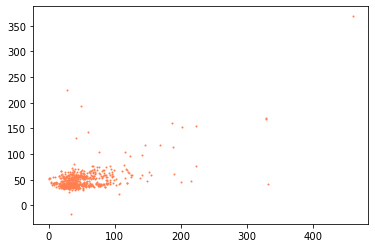


Ridge estimation of ie



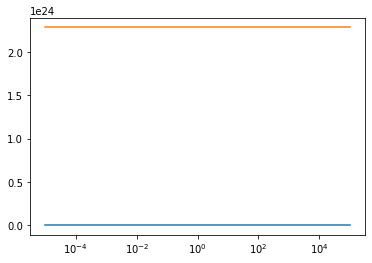

best param : argmin 40 => error 864.7104634228992 => alpha 1456.3484775012444


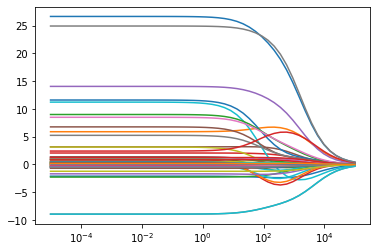

score : 0.6199478156476856
intercept : 46.67369664935176
performances :
	RMSE : 864.71
	R2 : 0.38


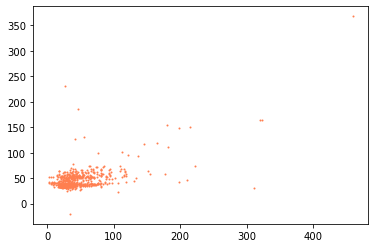


Ridge estimation of ie_e



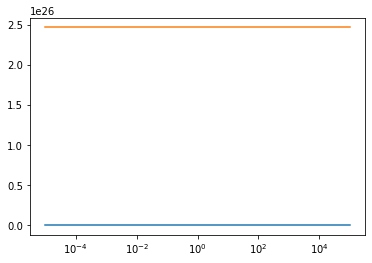

best param : argmin 38 => error 379.22133541167096 => alpha 568.9866029018305


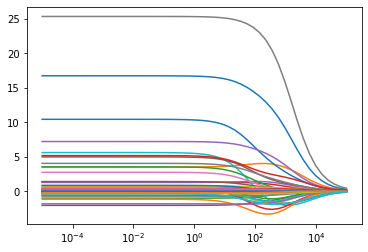

score : 0.7520267272776558
intercept : 31.689218153919242
performances :
	RMSE : 379.22
	R2 : 0.55


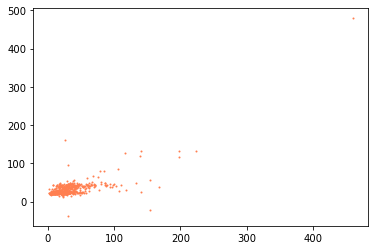


Ridge estimation of ie_s



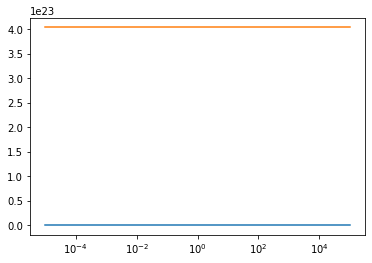

best param : argmin 44 => error 27.69721282946294 => alpha 9540.954763499964


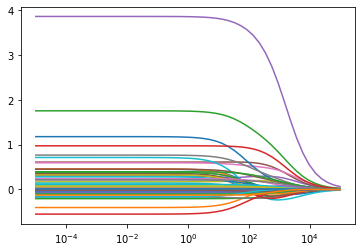

score : 0.10599026663142341
intercept : 0.9253700397688356
performances :
	RMSE : 27.7
	R2 : 0.03


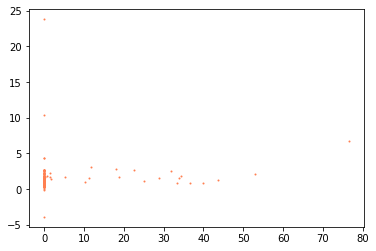


Ridge estimation of ie_g



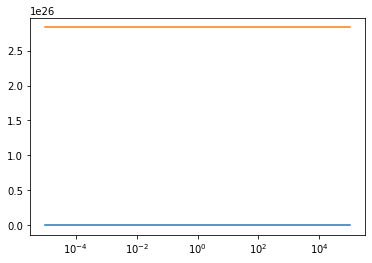

best param : argmin 40 => error 335.54972764955846 => alpha 1456.3484775012444


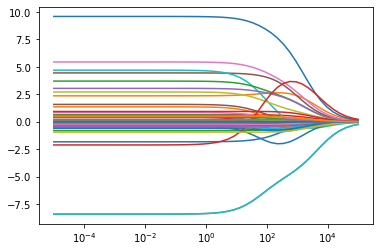

score : 0.46060025366440493
intercept : 13.88889132481472
performances :
	RMSE : 335.55
	R2 : 0.15


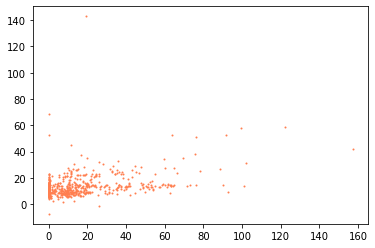


Ridge estimation of 1000 ih



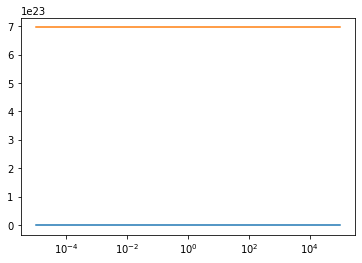

best param : argmin 41 => error 1.1402254233180331 => alpha 2329.951810515372


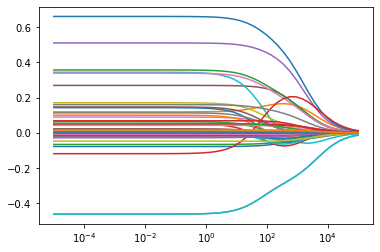

score : 0.4686366760828582
intercept : 1.0299824642207955
performances :
	RMSE : 1.14
	R2 : 0.16


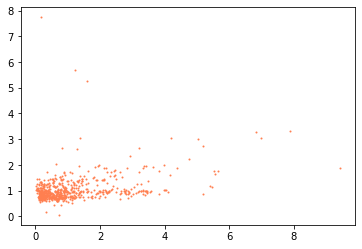


ALL, WITHOUT ENERGYSCORE

Ridge estimation of ies_wn



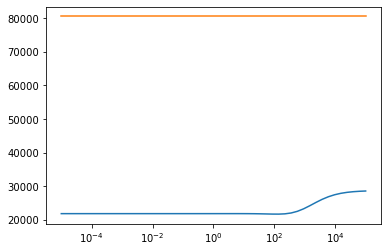

best param : argmin 35 => error 21673.101366567604 => alpha 138.9495494373139


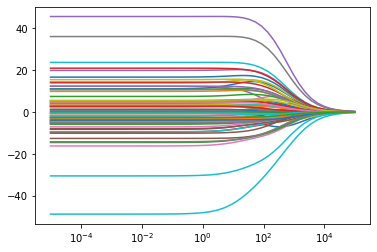

score : 0.46032841017492443
intercept : 170.69839877586227
performances :
	RMSE : 21673.1
	R2 : 0.24


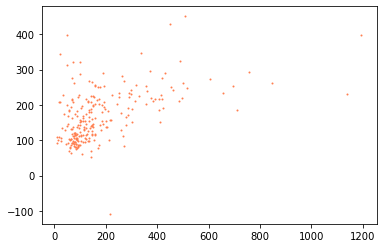


Ridge estimation of ies



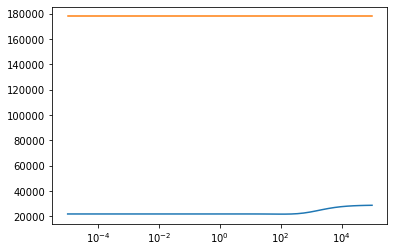

best param : argmin 35 => error 21694.25009528124 => alpha 138.9495494373139


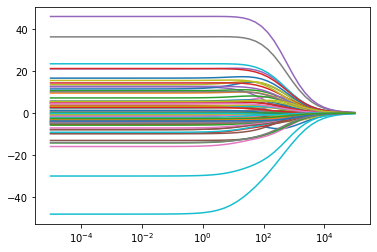

score : 0.4617941441474883
intercept : 166.51636969457047
performances :
	RMSE : 21694.25
	R2 : 0.24


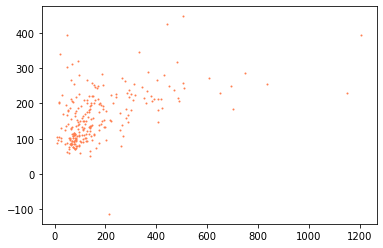


Ridge estimation of ie_wn



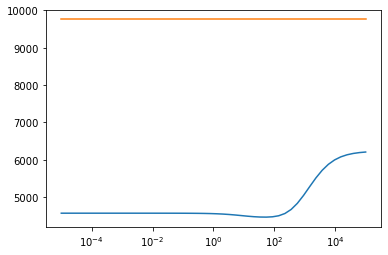

best param : argmin 33 => error 4468.619145188243 => alpha 54.286754393238596


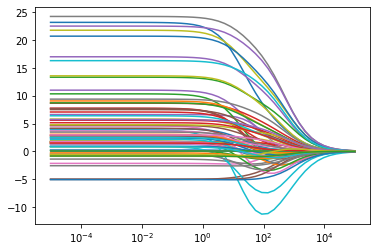

score : 0.48180692375180034
intercept : 70.48968664357643
performances :
	RMSE : 4468.62
	R2 : 0.28


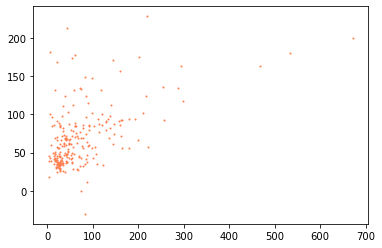


Ridge estimation of ie



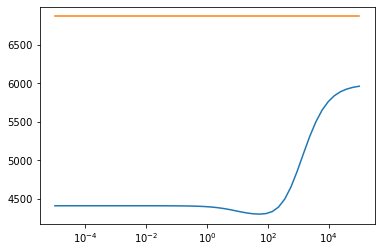

best param : argmin 33 => error 4296.903292876437 => alpha 54.286754393238596


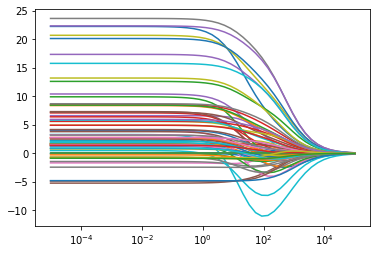

score : 0.4825961613868984
intercept : 67.47935433926969
performances :
	RMSE : 4296.9
	R2 : 0.28


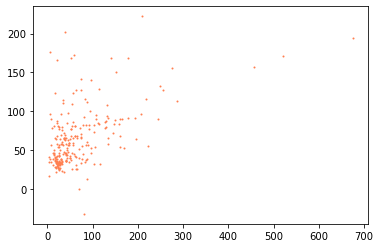


Ridge estimation of ie_e



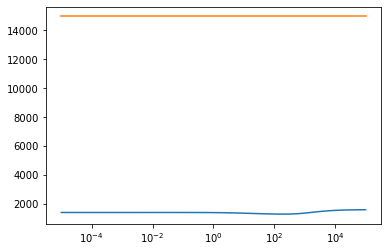

best param : argmin 36 => error 1276.1415404103632 => alpha 222.29964825261956


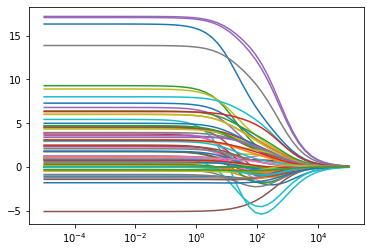

score : 0.4405216328292729
intercept : 41.55010503764867
performances :
	RMSE : 1276.14
	R2 : 0.19


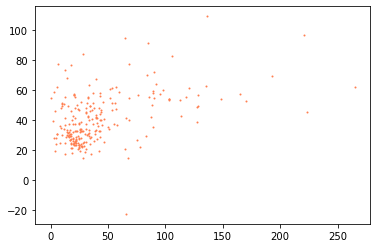


Ridge estimation of ie_s



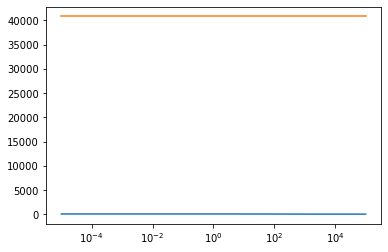

best param : argmin 42 => error 44.78830182771072 => alpha 3727.593720314938


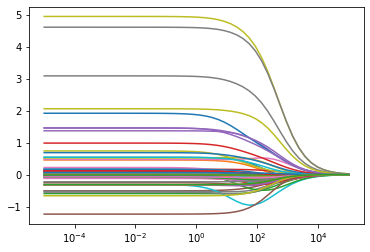

score : 0.07468934195957788
intercept : 2.099139244990384
performances :
	RMSE : 44.79
	R2 : 0.0


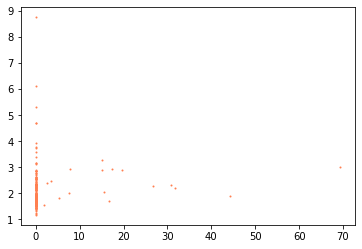


Ridge estimation of ie_g



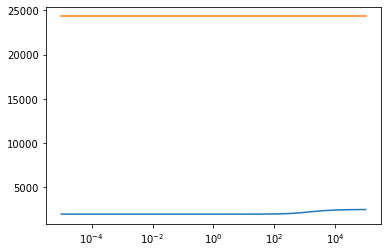

best param : argmin 0 => error 1991.9673076251574 => alpha 1e-05


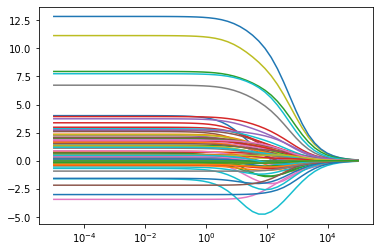

score : 0.3666000140132464
intercept : 23.77546503767618
performances :
	RMSE : 1991.97
	R2 : 0.21


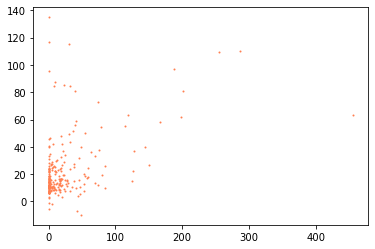


Ridge estimation of 1000 ih



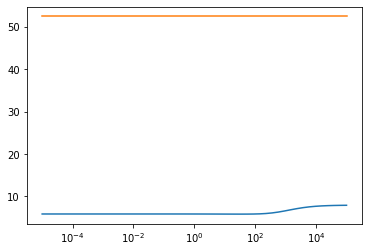

best param : argmin 32 => error 5.825256096614696 => alpha 33.9322177189533


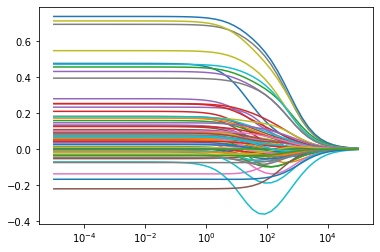

score : 0.4296213283237895
intercept : 1.714409048152127
performances :
	RMSE : 5.83
	R2 : 0.27


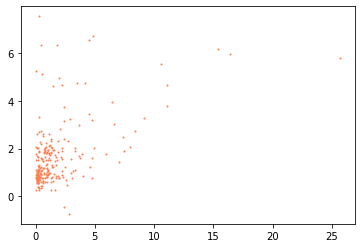


FAMILY, WITH ENERGYSCORE

Ridge estimation of ies_wn



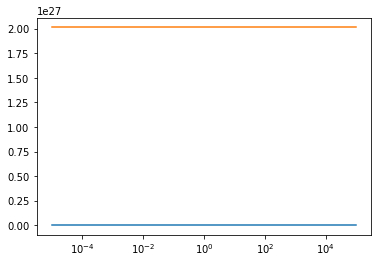

best param : argmin 36 => error 755.0190621878887 => alpha 222.29964825261956


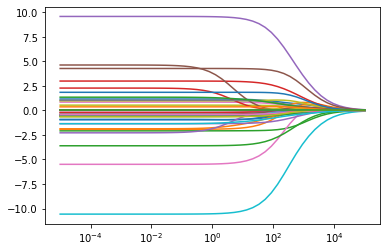

score : 0.1964643304891095
intercept : 97.36768916138064
performances :
	RMSE : 755.02
	R2 : 0.13


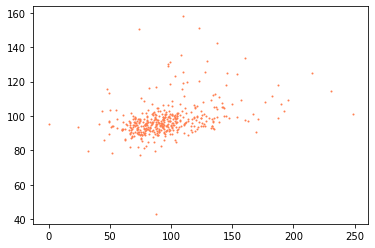


Ridge estimation of ies



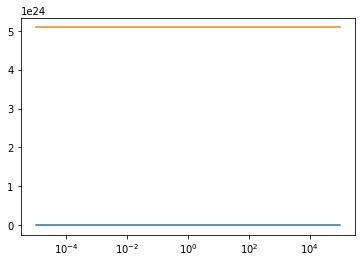

best param : argmin 36 => error 660.6550693655906 => alpha 222.29964825261956


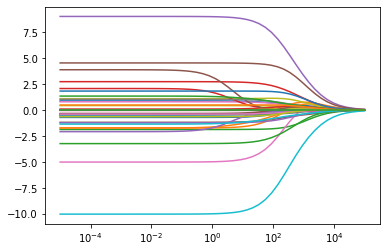

score : 0.20735312429026986
intercept : 92.20061346742354
performances :
	RMSE : 660.66
	R2 : 0.15


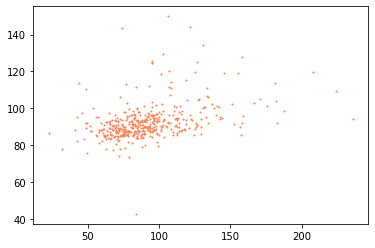


Ridge estimation of ie_wn



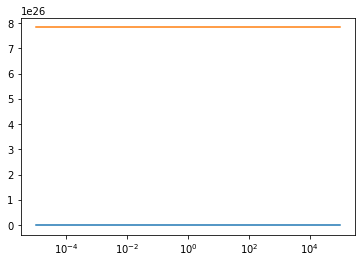

best param : argmin 24 => error 177.54128980130758 => alpha 0.7906043210907702


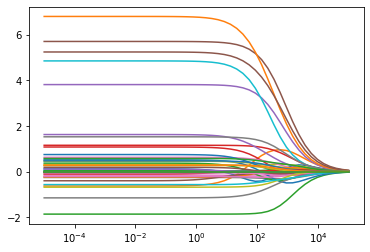

score : 0.36001679257330044
intercept : 36.340239750450166
performances :
	RMSE : 177.54
	R2 : 0.29


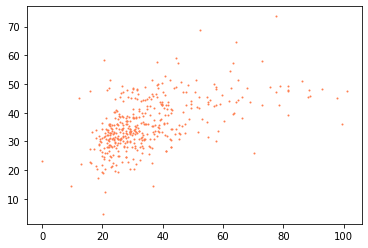


Ridge estimation of ie



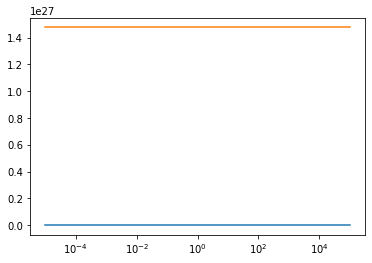

best param : argmin 24 => error 149.47733467925335 => alpha 0.7906043210907702


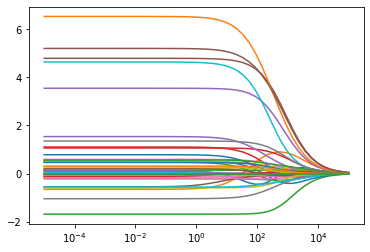

score : 0.36618649883736976
intercept : 34.10846489079108
performances :
	RMSE : 149.48
	R2 : 0.27


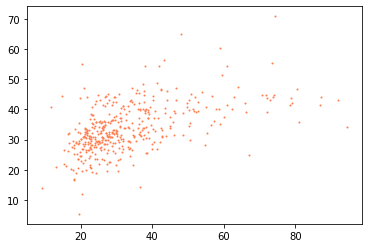


Ridge estimation of ie_e



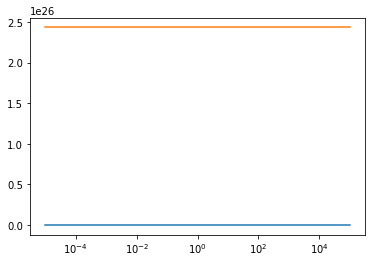

best param : argmin 35 => error 58.27822710860106 => alpha 138.9495494373139


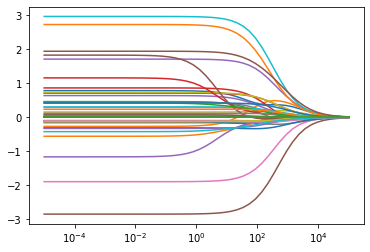

score : 0.209131315244934
intercept : 23.057425334792708
performances :
	RMSE : 58.28
	R2 : 0.17


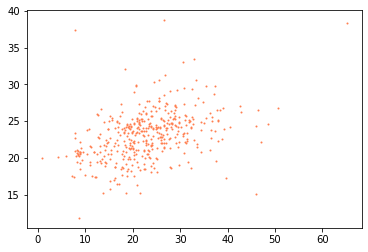


Ridge estimation of ie_s



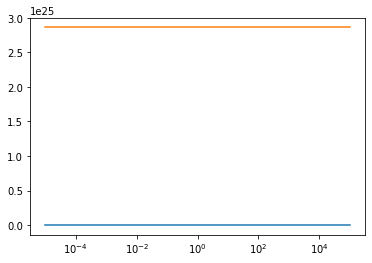

best param : argmin 26 => error 4.287337672767135 => alpha 2.0235896477251556


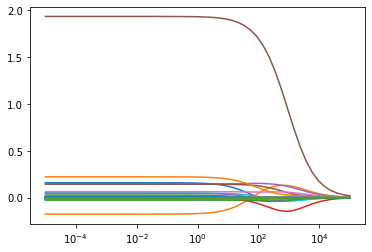

score : 0.556540177243366
intercept : 0.15867591992327598
performances :
	RMSE : 4.29
	R2 : 0.02


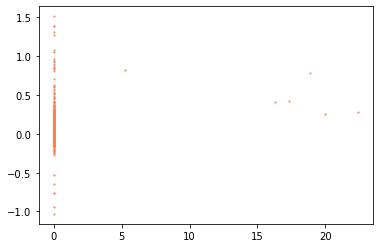


Ridge estimation of ie_g



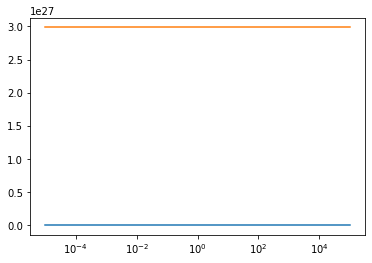

best param : argmin 34 => error 165.93420161642135 => alpha 86.85113737513521


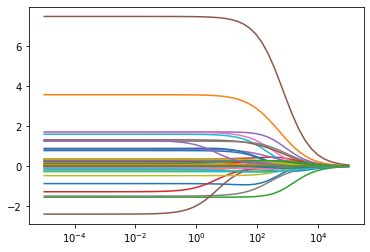

score : 0.24202025699463348
intercept : 10.885343698828029
performances :
	RMSE : 165.93
	R2 : 0.24


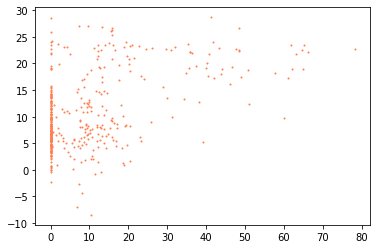


Ridge estimation of 1000 ih



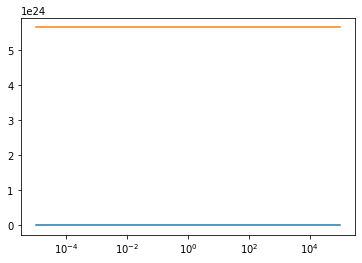

best param : argmin 34 => error 0.44903542408485536 => alpha 86.85113737513521


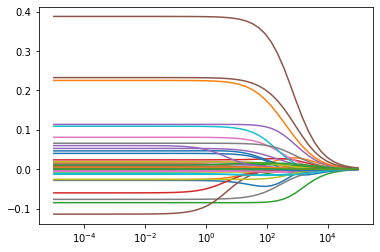

score : 0.30454750661414953
intercept : 0.751109971081283
performances :
	RMSE : 0.45
	R2 : 0.27


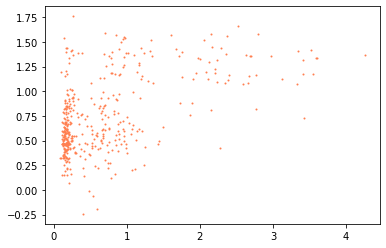


FAMILY, WITHOUT ENERGYSCORE

Ridge estimation of ies_wn



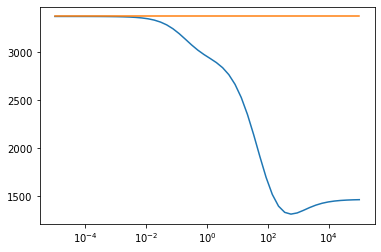

best param : argmin 38 => error 1311.8214849751348 => alpha 568.9866029018305


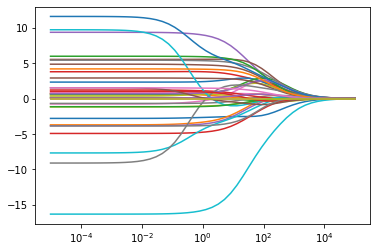

score : 0.2643816267034361
intercept : 103.51675952201143
performances :
	RMSE : 1311.82
	R2 : 0.1


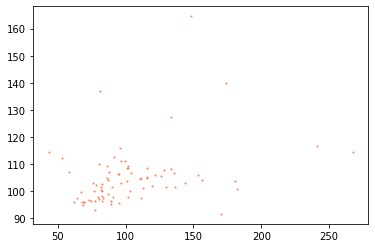


Ridge estimation of ies



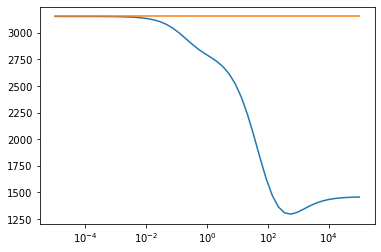

best param : argmin 38 => error 1296.5250035451543 => alpha 568.9866029018305


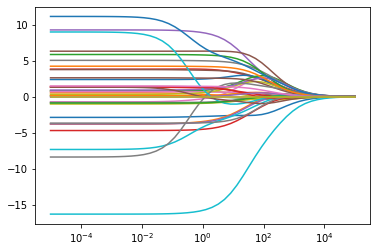

score : 0.2683307566353249
intercept : 99.0469273641902
performances :
	RMSE : 1296.53
	R2 : 0.11


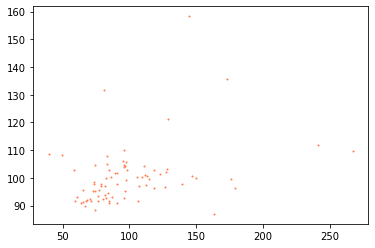


Ridge estimation of ie_wn



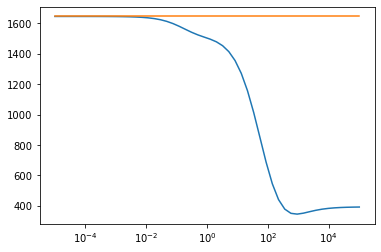

best param : argmin 39 => error 344.17437060426056 => alpha 910.2981779915227


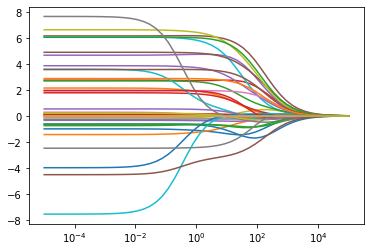

score : 0.18979644045325905
intercept : 37.974198848383914
performances :
	RMSE : 344.17
	R2 : 0.12


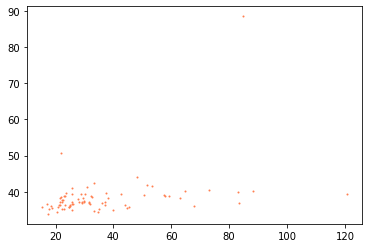


Ridge estimation of ie



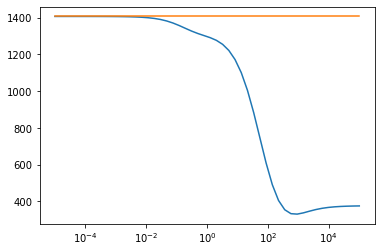

best param : argmin 39 => error 330.6379533851157 => alpha 910.2981779915227


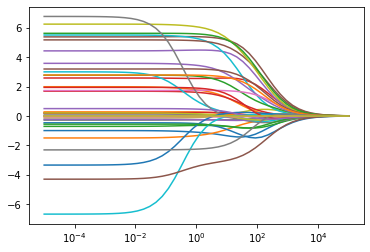

score : 0.1902779942137971
intercept : 35.91116887317224
performances :
	RMSE : 330.64
	R2 : 0.12


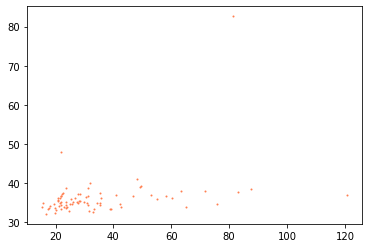


Ridge estimation of ie_e



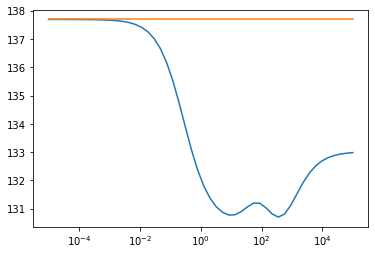

best param : argmin 37 => error 130.7070603064381 => alpha 355.64803062231283


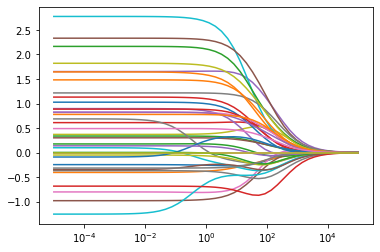

score : 0.20641957577827574
intercept : 23.596797249319216
performances :
	RMSE : 130.71
	R2 : -0.01


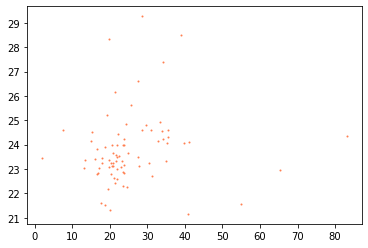


Ridge estimation of ie_s



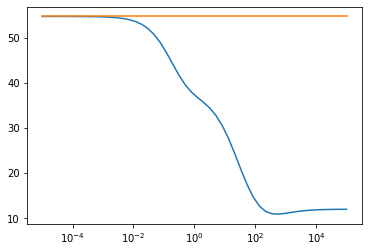

best param : argmin 38 => error 10.849465522783431 => alpha 568.9866029018305


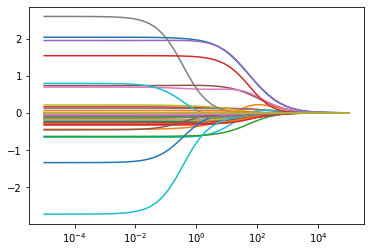

score : 0.09440922852350486
intercept : 0.42824637158345924
performances :
	RMSE : 10.85
	R2 : 0.09


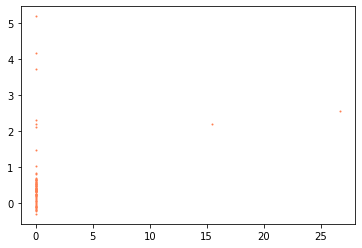


Ridge estimation of ie_g



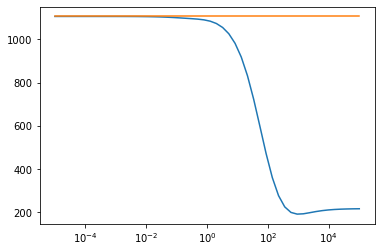

best param : argmin 39 => error 191.7301927760775 => alpha 910.2981779915227


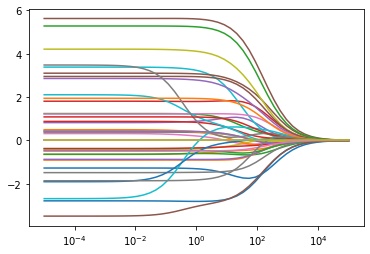

score : 0.16092987917534263
intercept : 11.886123968638707
performances :
	RMSE : 191.73
	R2 : 0.07


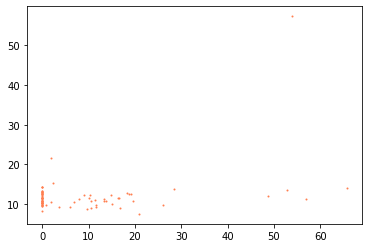


Ridge estimation of 1000 ih



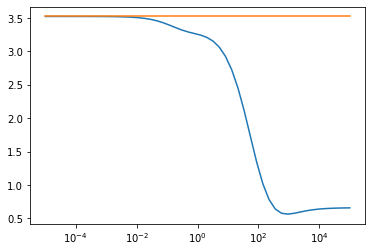

best param : argmin 39 => error 0.5623375570475044 => alpha 910.2981779915227


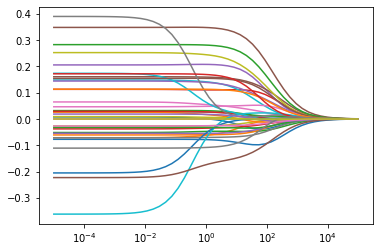

score : 0.16466074148137944
intercept : 0.8288254711108063
performances :
	RMSE : 0.56
	R2 : 0.12


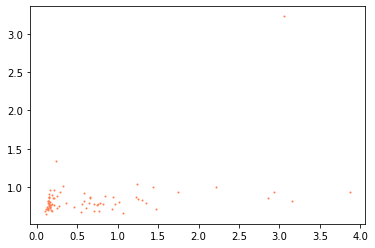


BUSINESS, WITH ENERGYSCORE

Ridge estimation of ies_wn



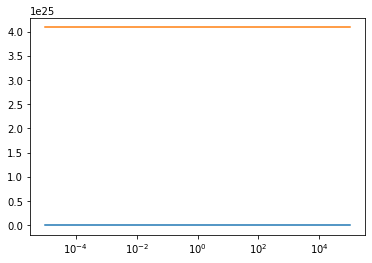

best param : argmin 31 => error 9983.506135161511 => alpha 21.209508879201927


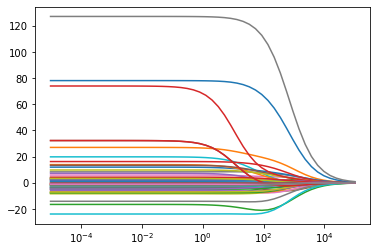

score : 0.7301582675460585
intercept : 173.7136885899996
performances :
	RMSE : 9983.51
	R2 : 0.71


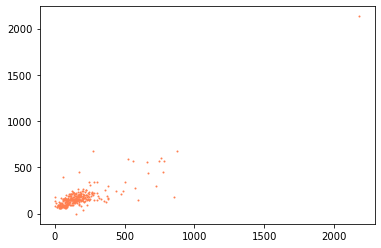


Ridge estimation of ies



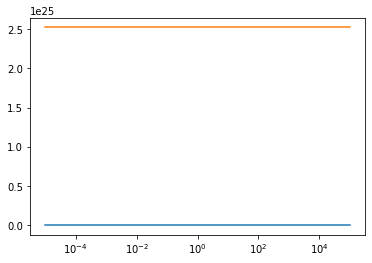

best param : argmin 31 => error 9805.27925682228 => alpha 21.209508879201927


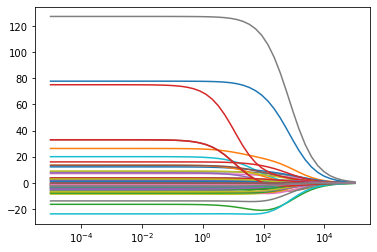

score : 0.7336670610232259
intercept : 170.91556218966815
performances :
	RMSE : 9805.28
	R2 : 0.71


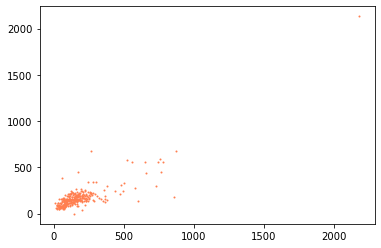


Ridge estimation of ie_wn



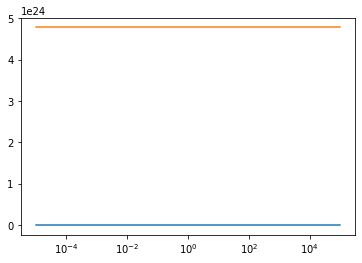

best param : argmin 36 => error 1255.3837437512007 => alpha 222.29964825261956


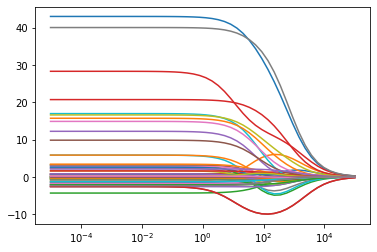

score : 0.7058209744726734
intercept : 67.55580073438026
performances :
	RMSE : 1255.38
	R2 : 0.58


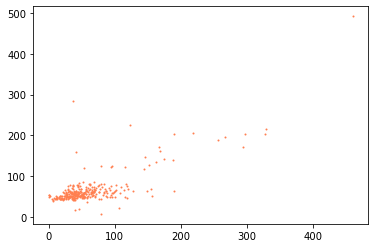


Ridge estimation of ie



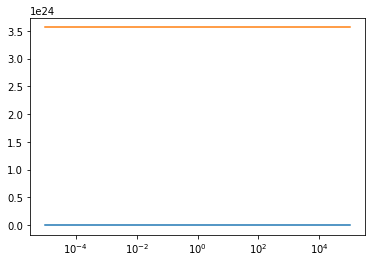

best param : argmin 36 => error 1170.7760407661137 => alpha 222.29964825261956


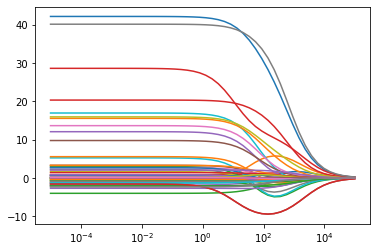

score : 0.709530915910471
intercept : 65.01655709356238
performances :
	RMSE : 1170.78
	R2 : 0.6


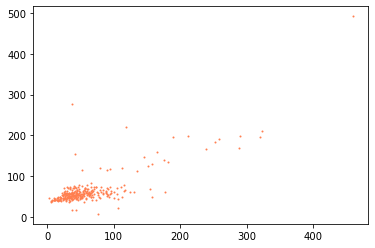


Ridge estimation of ie_e



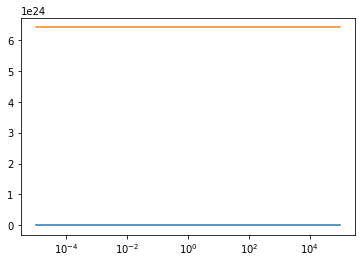

best param : argmin 36 => error 569.7713557051894 => alpha 222.29964825261956


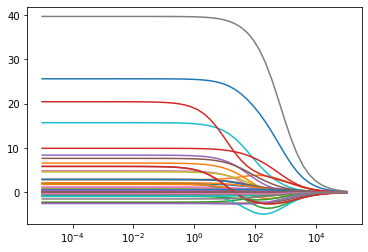

score : 0.7496368022886846
intercept : 43.53718900820207
performances :
	RMSE : 569.77
	R2 : 0.68


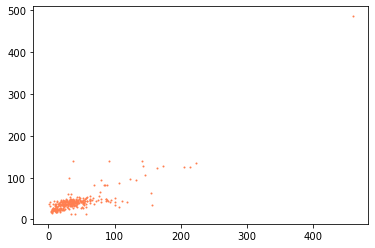


Ridge estimation of ie_s



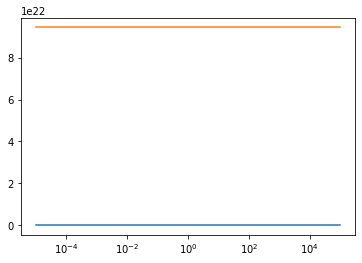

best param : argmin 39 => error 78.25392126025521 => alpha 910.2981779915227


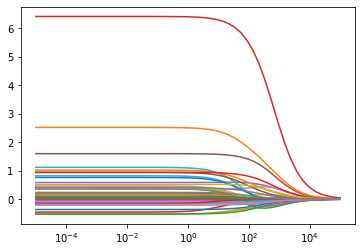

score : 0.3241071855200993
intercept : 1.780178117631521
performances :
	RMSE : 78.25
	R2 : 0.15


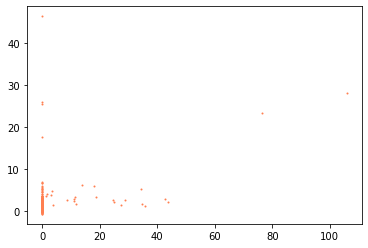


Ridge estimation of ie_g



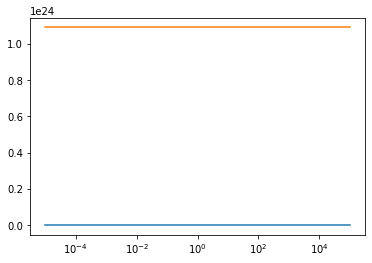

best param : argmin 37 => error 374.0586076197707 => alpha 355.64803062231283


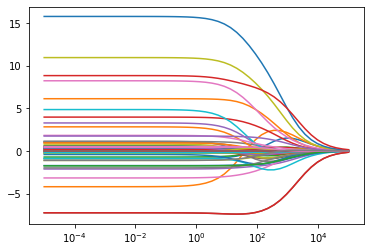

score : 0.6003051063280987
intercept : 19.382996171777002
performances :
	RMSE : 374.06
	R2 : 0.29


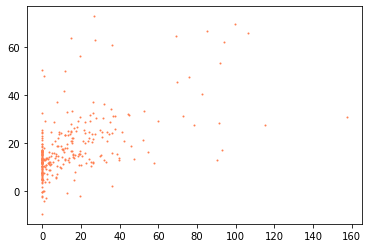


Ridge estimation of 1000 ih



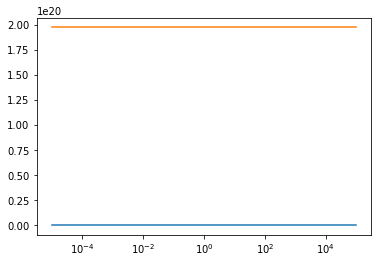

best param : argmin 37 => error 1.370124884127966 => alpha 355.64803062231283


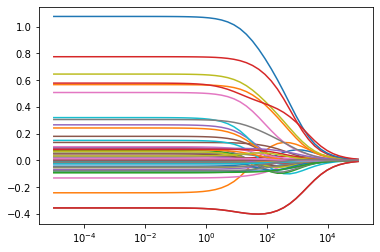

score : 0.6395032043415441
intercept : 1.4703512863812411
performances :
	RMSE : 1.37
	R2 : 0.37


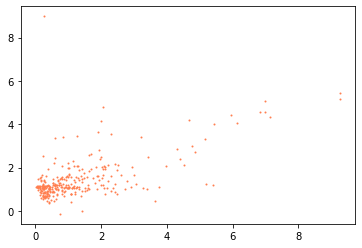


BUSINESS, WITHOUT ENERGYSCORE

Ridge estimation of ies_wn



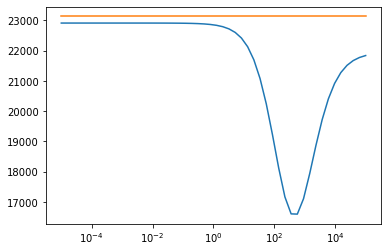

best param : argmin 38 => error 16597.785502682724 => alpha 568.9866029018305


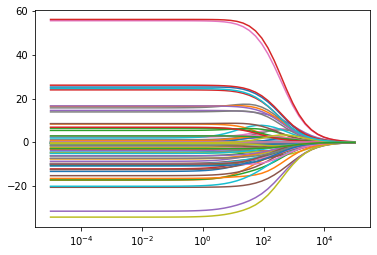

score : 0.3063364279688646
intercept : 212.23115181801185
performances :
	RMSE : 16597.79
	R2 : 0.23


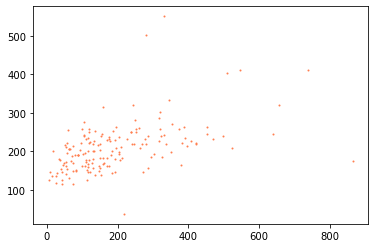


Ridge estimation of ies



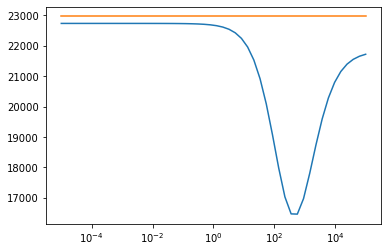

best param : argmin 38 => error 16454.4218738758 => alpha 568.9866029018305


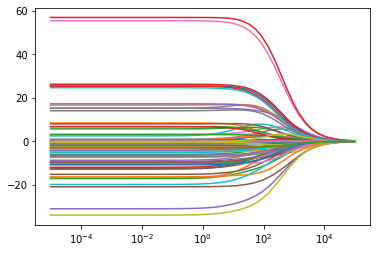

score : 0.3075068264664975
intercept : 208.5413607662318
performances :
	RMSE : 16454.42
	R2 : 0.23


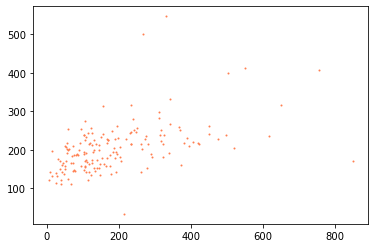


Ridge estimation of ie_wn



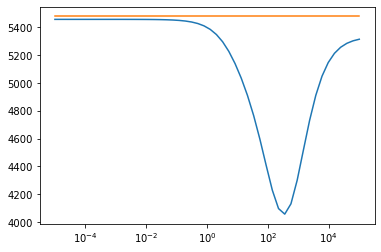

best param : argmin 37 => error 4057.436689384349 => alpha 355.64803062231283


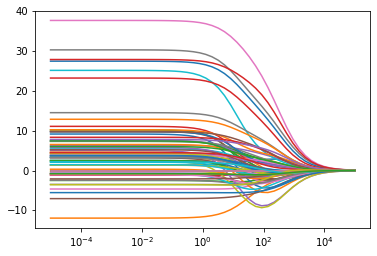

score : 0.337771765657659
intercept : 88.12108010322764
performances :
	RMSE : 4057.44
	R2 : 0.24


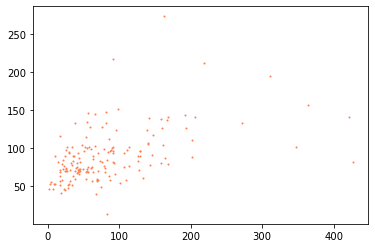


Ridge estimation of ie



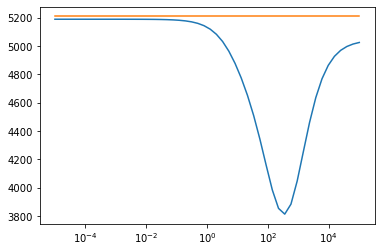

best param : argmin 37 => error 3813.7779389292914 => alpha 355.64803062231283


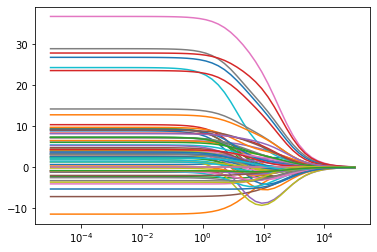

score : 0.3386815653322839
intercept : 84.76635837375697
performances :
	RMSE : 3813.78
	R2 : 0.24


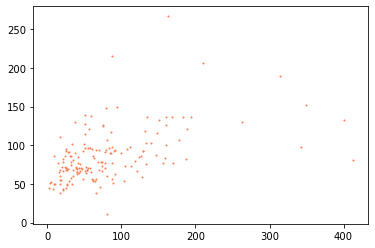


Ridge estimation of ie_e



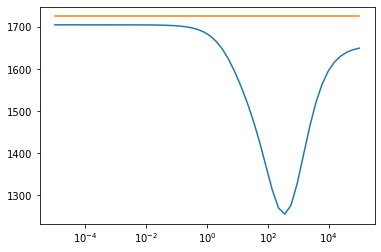

best param : argmin 37 => error 1254.8132417161107 => alpha 355.64803062231283


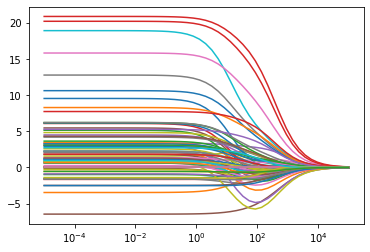

score : 0.3350534324460065
intercept : 51.486641692012086
performances :
	RMSE : 1254.81
	R2 : 0.23


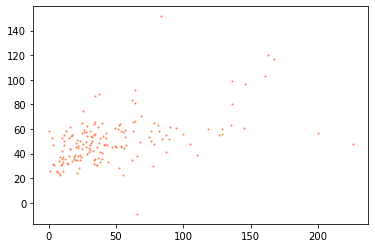


Ridge estimation of ie_s



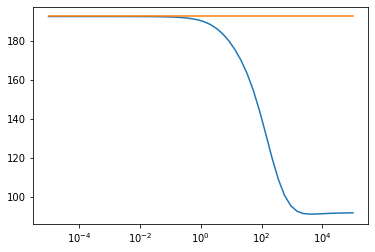

best param : argmin 42 => error 91.1620985268639 => alpha 3727.593720314938


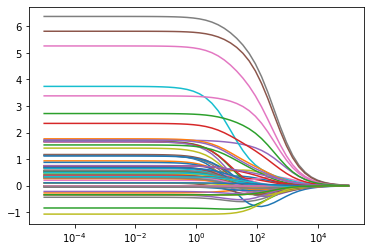

score : 0.07320802290402084
intercept : 3.037840124635664
performances :
	RMSE : 91.16
	R2 : -0.02


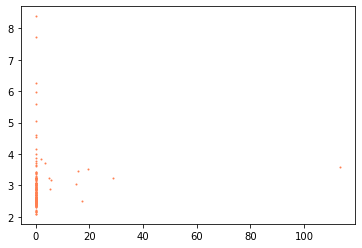


Ridge estimation of ie_g



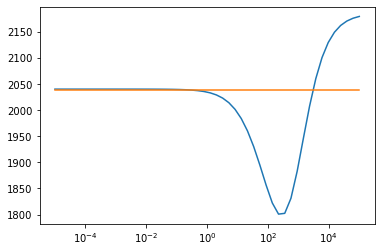

best param : argmin 36 => error 1800.9741469983533 => alpha 222.29964825261956


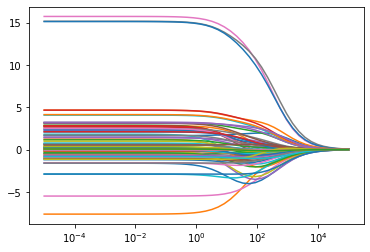

score : 0.2862033744532342
intercept : 30.164132367022123
performances :
	RMSE : 1800.97
	R2 : 0.18


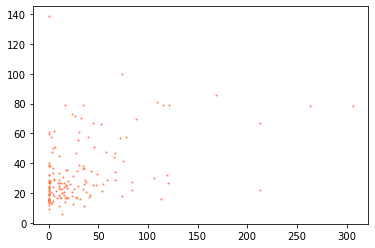


Ridge estimation of 1000 ih



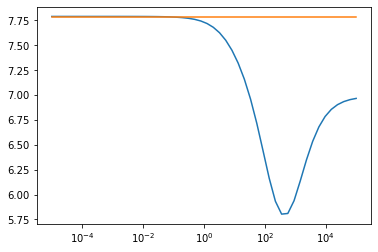

best param : argmin 37 => error 5.803961971489755 => alpha 355.64803062231283


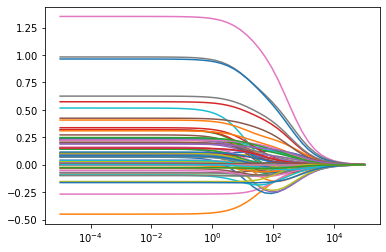

score : 0.32844386526770275
intercept : 2.1954420554522764
performances :
	RMSE : 5.8
	R2 : 0.17


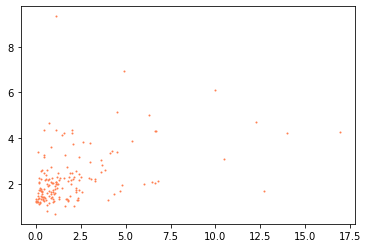

In [36]:
print_title('All, with EnergyScore'); ml_main_2_ridge(_XYes)
print_title('All, without EnergyScore'); ml_main_2_ridge(_XYnoes)
print_title('Family, with EnergyScore'); ml_main_2_ridge(_XYfes)
print_title('Family, without EnergyScore'); ml_main_2_ridge(_XYfnoes)
print_title('Business, with EnergyScore'); ml_main_2_ridge(_XYbes)
print_title('Business, without EnergyScore'); ml_main_2_ridge(_XYbnoes)

# Tableau des scores

Objectif : produire un CSV des scores obtenus, rechargeable et complétable à chaque nouvelle exécution.

Ce tableau enregistre les informations suivantes :
* La date et heure de l'exécution
* La méthode utilisée (y compris pipelines)
* Les hyperparamètres utilisés
* le jeu de données utilisé (il faut enregistrer leur description et les nommer)
* la target ciblée
* la dummy utilisée en référence
* Le score obtenu sur l'ensemble d'entraînement (par la fonction score)
* Le score obtenu sur l'ensemble de test
* Le score r2 de la dummy, et le score sur le jeu de test

Il faut les fonction suivantes :
* enregistrer / charger
* append de nouveaux enregistrements
* suppression d'enregistrements
* impression au format markdown
* export Gsheet

## Production d'une v1

In [37]:
from pepper_skl_commons import test_append_scores
test_append_scores()

date                                       method  \
0 2022-10-20 17:53:24.026122  <class 'sklearn.linear_model._ridge.Ridge'>   
1 2022-10-20 17:53:24.026122  <class 'sklearn.linear_model._ridge.Ridge'>   

  params dataset target dummy train_score test_score r2 dummy_r2  
0      _       _      _     _           _          _  _        _  
1      _       _      _     _           _          _  _        _


Ridge estimation of ies_wn



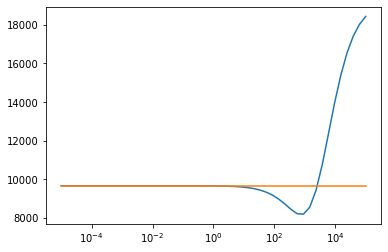

best param : argmin 39 => error 8181.149096283032 => alpha 910.2981779915227


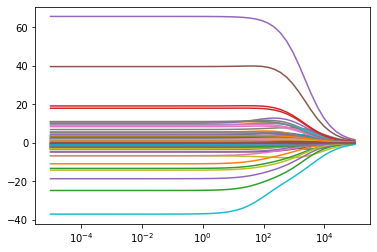

score : 0.5447126425074751
intercept : 140.84407156705777
performances :
	RMSE : 8181.15
	R2 : 0.57


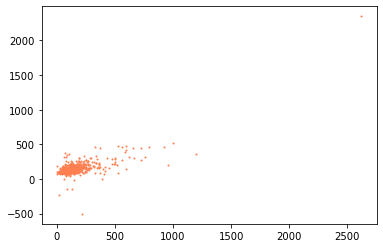


Ridge estimation of ies



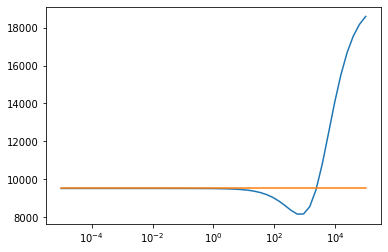

best param : argmin 38 => error 8145.61453699028 => alpha 568.9866029018305


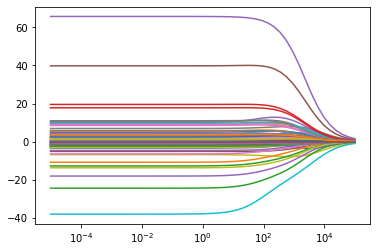

score : 0.5711614618269889
intercept : 136.89042509893648
performances :
	RMSE : 8145.61
	R2 : 0.58


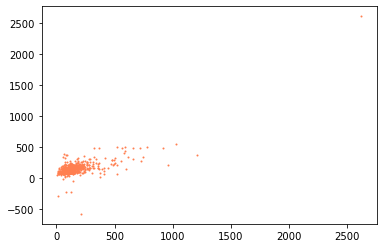


Ridge estimation of ie_wn



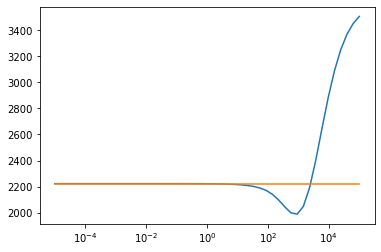

best param : argmin 39 => error 1989.8427823519805 => alpha 910.2981779915227


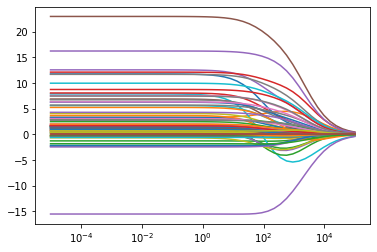

score : 0.5215487295502002
intercept : 53.83690178385483
performances :
	RMSE : 1989.84
	R2 : 0.45


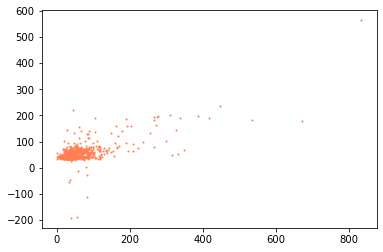


Ridge estimation of ie



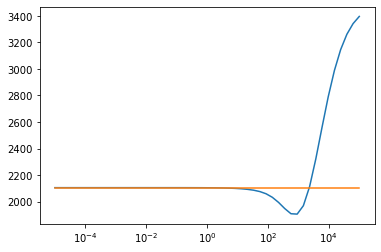

best param : argmin 39 => error 1905.548659362813 => alpha 910.2981779915227


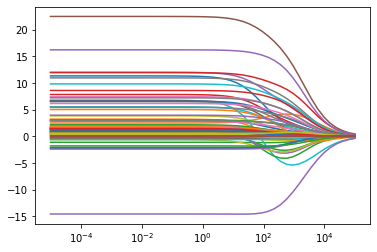

score : 0.525150744201389
intercept : 51.45506765453866
performances :
	RMSE : 1905.55
	R2 : 0.45


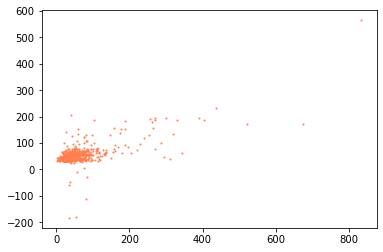


Ridge estimation of ie_e



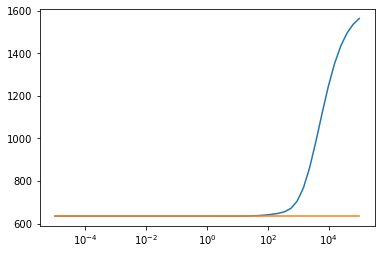

best param : argmin 29 => error 634.9318525137958 => alpha 8.286427728546842


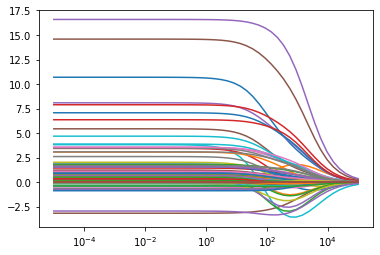

score : 0.5853827104673195
intercept : 34.07392383097558
performances :
	RMSE : 634.93
	R2 : 0.61


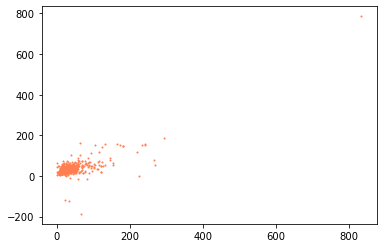


Ridge estimation of ie_s



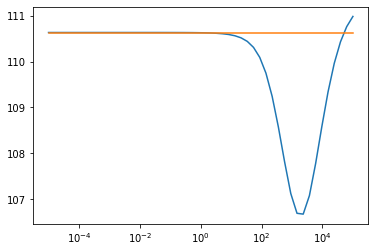

best param : argmin 41 => error 106.67245417685804 => alpha 2329.951810515372


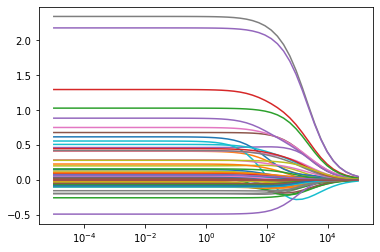

score : 0.19370395979041655
intercept : 1.1110279471369289
performances :
	RMSE : 106.67
	R2 : 0.04


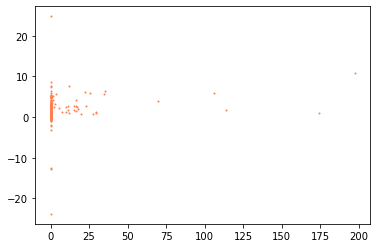


Ridge estimation of ie_g



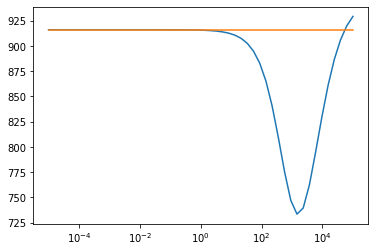

best param : argmin 40 => error 733.5270386820547 => alpha 1456.3484775012444


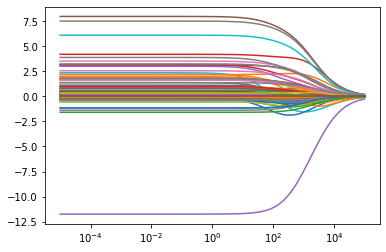

score : 0.3846929021714738
intercept : 16.12000616387609
performances :
	RMSE : 733.53
	R2 : 0.22


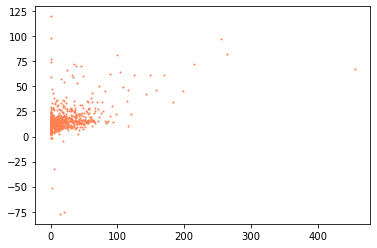


Ridge estimation of 1000 ih



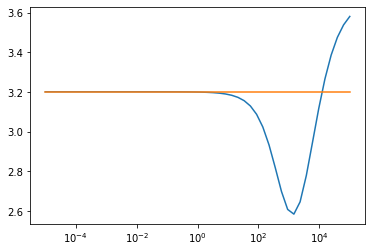

best param : argmin 40 => error 2.583786931766055 => alpha 1456.3484775012444


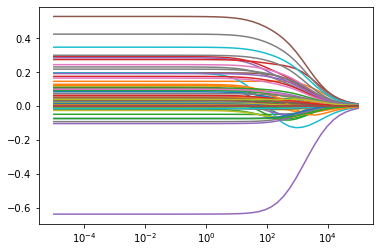

score : 0.4220202234366224
intercept : 1.179435560898065
performances :
	RMSE : 2.58
	R2 : 0.29


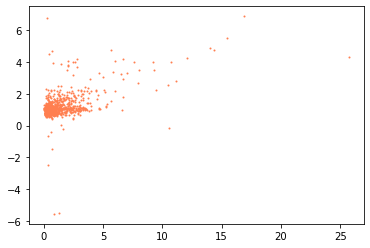

date                                       method  \
0 2022-10-20 17:59:02.324331  <class 'sklearn.linear_model._ridge.Ridge'>   
1 2022-10-20 17:59:03.337303  <class 'sklearn.linear_model._ridge.Ridge'>   
2 2022-10-20 17:59:04.258301  <class 'sklearn.linear_model._ridge.Ridge'>   
3 2022-10-20 17:59:05.350306  <class 'sklearn.linear_model._ridge.Ridge'>   
4 2022-10-20 17:59:06.383303  <class 'sklearn.linear_model._ridge.Ridge'>   
5 2022-10-20 17:59:07.418302  <class 'sklearn.linear_model._ridge.Ridge'>   
6 2022-10-20 17:59:08.540316  <class 'sklearn.linear_model._ridge.Ridge'>   
7 2022-10-20 17:59:09.682305  <class 'sklearn.linear_model._ridge.Ridge'>   

                          params  dataset   target  dummy  train_score  \
0   {'alpha': 910.2981779915227}  dataset   ies_wn  dummy     0.544713   
1   {'alpha': 568.9866029018305}  dataset      ies  dummy     0.571161   
2   {'alpha': 910.2981779915227}  dataset    ie_wn  dummy     0.521549   
3   {'alpha': 910.2981779915227}  dataset       ie  dummy     0.525151   
4   {'alpha': 8.286427728546842}  dataset     ie_e  dummy     0.585383   
5   {'alpha': 2329.951810515372}  dataset     ie_s  dummy     0.193704   
6  {'alpha': 1456.3484775012444}  dataset     ie_g  dummy     0.384693   
7  {'alpha': 1456.3484775012444}  dataset  1000 ih  dummy     0.422020   

   test_score        r2      dummy_r2  
0    0.573635  0.573635  _dummy_score  
1    0.579413  0.579413  _dummy_score  
2    0.447953  0.447953  _dummy_score  
3    0.454543  0.454543  _dummy_score  
4    0.606761  0.606761  _dummy_score  
5    0.042346  0.042346  _dummy_score  
6    0.224572  0.224572  _dummy_score  
7    0.293592  0.293592  _dummy_score

In [40]:
from pepper_skl_commons import ml_main_3_ridge_scored
scores = ml_main_3_ridge_scored(_XY)
display(scores)

In [77]:
def save_scores(scores):
    scores.to_csv('scores.csv', encoding='utf-8', index=False)

save_scores(scores)

In [41]:
def load_scores():
    scores = pd.read_csv('scores.csv', encoding='utf-8')
    return scores

scores = load_scores()
scores = scores.drop(columns=scores.columns[0])
display(scores)

date                                       method  \
0  2022-10-20 11:57:18.260616  <class 'sklearn.linear_model._ridge.Ridge'>   
1  2022-10-20 11:57:19.221617  <class 'sklearn.linear_model._ridge.Ridge'>   
2  2022-10-20 11:57:20.376628  <class 'sklearn.linear_model._ridge.Ridge'>   
3  2022-10-20 11:57:21.372619  <class 'sklearn.linear_model._ridge.Ridge'>   
4  2022-10-20 11:57:22.303619  <class 'sklearn.linear_model._ridge.Ridge'>   
5  2022-10-20 11:57:23.240620  <class 'sklearn.linear_model._ridge.Ridge'>   
6  2022-10-20 11:57:24.293620  <class 'sklearn.linear_model._ridge.Ridge'>   
7  2022-10-20 11:57:25.344618  <class 'sklearn.linear_model._ridge.Ridge'>   

                          params  dataset   target  dummy  train_score  \
0  {'alpha': 222.29964825261956}  dataset   ies_wn  dummy     0.621519   
1  {'alpha': 222.29964825261956}  dataset      ies  dummy     0.625480   
2               {'alpha': 1e-05}  dataset    ie_wn  dummy     0.576161   
3               {'alpha': 1e-05}  dataset       ie  dummy     0.582280   
4               {'alpha': 1e-05}  dataset     ie_e  dummy     0.641494   
5   {'alpha': 9540.954763499964}  dataset     ie_s  dummy     0.118324   
6               {'alpha': 1e-05}  dataset     ie_g  dummy     0.332832   
7               {'alpha': 1e-05}  dataset  1000 ih  dummy     0.449456   

   test_score        r2      dummy_r2  
0    0.478941  0.478941  _dummy_score  
1    0.486697  0.486697  _dummy_score  
2    0.438904  0.438904  _dummy_score  
3    0.446646  0.446646  _dummy_score  
4    0.515507  0.515507  _dummy_score  
5    0.022476  0.022476  _dummy_score  
6    0.281198  0.281198  _dummy_score  
7    0.324945  0.324945  _dummy_score

# Random_state

La sélection initiale du jeu d'entraînement est déterminante sur les performances.

Deux buts :
1. stabiliser mes résultats
2. trouver le meilleur random_state

Il s'agit en gros d'un hyper hyperparamètre.

Comment procéder ?
1. ✔ commencer par 10 itérations de la v1 tableau scores avec random_state=0, .., 9
2. ✔ modifier la fonction pour qu'elle soit moins verbeuse en graphiques (juste tableau des scores)
3. ✔ faire une recherche intelligente de la meilleure performance --> meilleur random_state
4. enrichir le tableau des scores et finaliser (CSV avec updates + GSheet)

Documentation :
* https://stackoverflow.com/questions/43321394/what-is-random-state-parameter-in-scikit-learn-tsne
* https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
* **https://medium.com/analytics-vidhya/what-is-random-state-in-machine-learning-84c1c9dffaad**
* https://github.com/Aryal-Shanta/Classification_Prediction_Machine_Learning
* https://github.com/Aryal-Shanta/Classification_Prediction_Machine_Learning/blob/master/Plotting_and_splitting_data.ipynb

In [45]:
X, Y = get_X_Y(ml_data) # TODO : faire que X reste un dataframe
display(X)
display(Y)

bid  pid         x          y   z   t        asc       s_e       s_i  \
id                                                                            
1        0    7  47.61220 -122.33799  12  89  11.390012  0.000000  1.000000   
2        0    7  47.61317 -122.33393  11  20  11.547964  0.145453  0.854547   
3        0    7  47.61393 -122.33810  41  47  13.770628  0.205748  0.794252   
5        0    7  47.61412 -122.33664  10  90  11.023861  0.000000  1.000000   
8        0    7  47.61375 -122.34047  18  36  12.075850  0.353115  0.646885   
...    ...  ...       ...        ...  ..  ..        ...       ...       ...   
50221    4    3  47.54067 -122.37441   1  34   9.812523  0.000000  1.000000   
50223    4    3  47.59625 -122.32283   1  12   9.680344  0.000000  1.000000   
50224    4    3  47.63644 -122.35784   1  42   9.484709  0.000000  1.000000   
50225    4    5  47.52832 -122.32431   1  27   9.554001  0.000000  1.000000   
50226    4    5  47.53939 -122.29536   1  78   9.812359  0.000000  1.000000   

       s_u_0  ...  s_u_57  s_u_58  s_u_59  s_u_60  s_u_61  s_u_62  s_u_63  \
id            ...                                                           
1        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8        0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
50221    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50223    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50224    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50225    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50226    0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       s_u_64  s_u_65  s_u_66  
id                             
1         0.0     0.0     0.0  
2         0.0     0.0     0.0  
3         0.0     0.0     0.0  
5         0.0     0.0     0.0  
8         0.0     0.0     0.0  
...       ...     ...     ...  
50221     0.0     0.0     0.0  
50223     0.0     0.0     0.0  
50224     0.0     0.0     0.0  
50225     0.0     0.0     0.0  
50226     0.0     0.0     0.0  

[3193 rows x 76 columns]

ies_wn         ies       ie_wn          ie        ie_e       ie_s  \
id                                                                             
1      189.000000  182.500000   84.321754   81.714753   44.621152  22.659633   
2      179.399994  176.100006   83.661424   80.991184   31.311927   0.000000   
3      244.100006  241.899994   77.331177   75.919114   51.800174  22.556561   
5      224.000000  216.199997  113.287679  110.805349   45.155316  36.112953   
8      215.600006  211.399994   83.474786   80.718795   30.576415   0.000000   
...           ...         ...         ...         ...         ...        ...   
50221  136.600006  126.000000   56.154215   51.042228   34.629101   0.000000   
50223  118.900002  114.199997   65.856609   59.392262   24.784128   0.000000   
50224  767.799988  744.799988  460.117390  438.238048  136.213328   0.000000   
50225  110.800003  105.300003   55.516723   51.022707   24.740811   0.000000   
50226  123.900002  115.800003   70.857836   63.144717   23.691217   0.000000   

             ie_g    1000 ih  
id                            
1       14.433962   2.826741  
2       49.679258   2.856729  
3        1.562373   2.185188  
5       29.537068   4.671070  
8       50.142374   2.876239  
...           ...        ...  
50221   16.413121   1.113302  
50223   34.608124   2.010625  
50224  302.024706  16.990195  
50225   26.281895   1.567974  
50226   39.453499   2.260379  

[3193 rows x 8 columns]

In [69]:
from sklearn import metrics
from pepper_skl_commons import print_perf_measures, get_baseline_err, best_ridge_alpha, empty_scores, append_score

def best_ridge_alpha_2(X_train, X_test, y_train, y_test, baseline_err, n_alphas = 50, verbose=False):
    alphas = np.logspace(-5, 5, n_alphas)   # distribution logarithmique entre 10^-5 et 10^5

    ridge = linear_model.Ridge()

    coefs, errors = [], []
    for a in alphas:
        ridge.set_params(alpha=a)
        ridge.fit(X_train, y_train)
        coefs.append(ridge.coef_)
        errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

    if verbose:
        ax = plt.gca()
        ax.plot(alphas, errors, [10**-5, 10**5], [baseline_err, baseline_err])
        ax.set_xscale('log')
        plt.show()

    # meilleur paramètre
    i = np.argmin(errors)
    if verbose:
        print('best param : argmin', i, '=> error', errors[i], '=> alpha', alphas[i])

        # chemin de régularisation
        ax = plt.gca()
        ax.plot(alphas, coefs)
        ax.set_xscale('log')
        plt.show()

    return alphas[i]


def ml_main_4_scored(XY, dataset_name, random_state, method_name='Ridge', verbose=False):
    X_train, X_test, Y_train, Y_test = XY

    scores = empty_scores()

    for c in Y_train.columns:
        if verbose:
            print_subtitle(f'{method_name} estimation of {c}\n')

        y_train = Y_train.loc[:, c]
        y_test = Y_test.loc[:, c]

        baseline_err = get_baseline_err(X_train, y_train, X_test, y_test)

        # recherche des meilleurs paramètres => à rendre plus générique
        alpha = best_ridge_alpha_2(X_train, X_test, y_train, y_test, baseline_err)

        reg = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
        
        if verbose:
            print(bold('score'), ':', reg.score(X_train, y_train))
            # print(bold('coefs'), ':', reg.coef_)
            print(bold('intercept'), ':', reg.intercept_)

        y_pred = reg.predict(X_test)

        # 5. performance et visualisation des résultats
        #print_accuracy(y_pred, y_test) # ici, sur de la régression,
        # c'est débile : faire une fonction cf. cours.
        if verbose:
            print_perf_measures(y_test, y_pred)
            plt.scatter(y_test, y_pred, s=1, color='coral')
            plt.show()

        score = [
            pd.Timestamp.now(),
            linear_model.Ridge,
            {
                'random_state': random_state,
                'alpha': alpha
            },
            dataset_name,
            c,
            'dummy',
            reg.score(X_train, y_train),
            reg.score(X_test, y_test),
            metrics.r2_score(y_test, y_pred),
            '_dummy_score'
        ]
        append_score(scores, score)
    
        # x 6 intégration de la matrice de confusion
        # (ben non, ce n'est pas adapté : c'est pour la classif.) => il va falloir s'y mettre
    return scores

In [72]:
from sklearn import model_selection

all_scores = []
for i in range(100):
    # print_title(f'random_state={i}')
    XY = X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=.3, random_state=i)
    _X_train, _X_test = scale_X(X_train, X_test)
    _XY = _X_train, _X_test, Y_train, Y_test
    scores = ml_main_4_scored(_XY, 'all', i)
    # display(scores)
    all_scores += [scores]
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)


date                                       method  \
599 2022-10-21 12:15:12.462460  <class 'sklearn.linear_model._ridge.Ridge'>   
751 2022-10-21 12:15:35.213460  <class 'sklearn.linear_model._ridge.Ridge'>   
255 2022-10-21 12:14:21.830455  <class 'sklearn.linear_model._ridge.Ridge'>   
279 2022-10-21 12:14:25.289462  <class 'sklearn.linear_model._ridge.Ridge'>   
303 2022-10-21 12:14:28.799460  <class 'sklearn.linear_model._ridge.Ridge'>   
..                         ...                                          ...   
656 2022-10-21 12:15:21.099458  <class 'sklearn.linear_model._ridge.Ridge'>   
696 2022-10-21 12:15:27.071461  <class 'sklearn.linear_model._ridge.Ridge'>   
224 2022-10-21 12:14:17.339457  <class 'sklearn.linear_model._ridge.Ridge'>   
120 2022-10-21 12:14:01.615465  <class 'sklearn.linear_model._ridge.Ridge'>   
240 2022-10-21 12:14:19.636456  <class 'sklearn.linear_model._ridge.Ridge'>   

                                                params dataset   target  \
599               {'random_state': 74, 'alpha': 1e-05}     all  1000 ih   
751               {'random_state': 93, 'alpha': 1e-05}     all  1000 ih   
255               {'random_state': 31, 'alpha': 1e-05}     all  1000 ih   
279  {'random_state': 34, 'alpha': 13.257113655901108}     all  1000 ih   
303               {'random_state': 37, 'alpha': 1e-05}     all  1000 ih   
..                                                 ...     ...      ...   
656  {'random_state': 82, 'alpha': 15264.179671752365}     all   ies_wn   
696   {'random_state': 87, 'alpha': 9540.954763499964}     all   ies_wn   
224            {'random_state': 28, 'alpha': 100000.0}     all   ies_wn   
120            {'random_state': 15, 'alpha': 100000.0}     all   ies_wn   
240            {'random_state': 30, 'alpha': 100000.0}     all   ies_wn   

     dummy  train_score  test_score        r2      dummy_r2  
599  dummy     0.474695    0.410455  0.410455  _dummy_score  
751  dummy     0.487043    0.397080  0.397080  _dummy_score  
255  dummy     0.466372    0.391948  0.391948  _dummy_score  
279  dummy     0.504945    0.374407  0.374407  _dummy_score  
303  dummy     0.497630    0.366359  0.366359  _dummy_score  
..     ...          ...         ...       ...           ...  
656  dummy     0.172552    0.090977  0.090977  _dummy_score  
696  dummy     0.212802    0.086744  0.086744  _dummy_score  
224  dummy     0.033940    0.023590  0.023590  _dummy_score  
120  dummy     0.034383    0.017832  0.017832  _dummy_score  
240  dummy     0.031903    0.016634  0.016634  _dummy_score  

[800 rows x 10 columns]

In [33]:
def get_target_best_score(scores, target):
    target_scores = all_scores[all_scores.target == target]
    return target_scores.loc[target_scores.index[0]]

targets = all_scores.target.unique()
for target in targets:
    target_best_score = get_target_best_score(all_scores, target)
    best_score = round(100 * target_best_score['r2'])
    random_state = target_best_score['params']['random_state']
    alpha = target_best_score['params']['alpha']
    #display(best_score)
    print_subtitle(f'{target} best score is {best_score}% with random_state={random_state} and alpha={alpha}')
    display(target_best_score)

TypeError: 'NoneType' object is not subscriptable

# Montée en puissance

Maintenant que tous les éléments de base (reste l'inspection de l'importance des caractéristiques), il s'agit de monter en puissance pour pouvoir tester un maximum d'algorithmes avec recherche de leur hyper-paramètres.

L'enjeu est ici :
1. la généricité : algorithme principal et ses auxiliaires les plus génériques possibles, ce qui se peut grâce à la régularité des interfaces qui ont été pensées suivant cet objectif.
2. attention aux temps de calcul.. c'est peut-être le moment où je vais devoir allumer ma machine de tueur.


3. modifier la fonction pour qu'elle soit plus générique (méthode et paramètres changeables)
4. monter en puissance (diverses méthodes, plus de random_states)
5. transiter vers le travail plus fin par classes (sous-ensembles : avec ou sans EnergyScore, les bureaux, etc). Penser à réintégrer comme features les targets autres que celle visée pour voir ce que cela donne. Refaire un tour sur les données éventuellement oubliées.

Ensuite, il sera temps de repasser sur feature importance / inspection et intégrer ce que j'ai déjà étudié.

## Dataset

Nous nous dotons d'une structure pour regrouper les paramètres de partition et les parties du jeu de donnée en vue de la modélisation (sépération des jeux d'entrainement et de test, normalisation, etc).

In [12]:
"""
dataset : structure qui contient :
un nom,
la composition (caractéristiques et cibles),
le random_state,
le test_size,
etc (mettre en oeuvre la stratification)
et :
X_train, X_test, Y_train, Y_test
_X_train, _Y_test
X (X_train, X_test)
_X (_X_train, _X_test)
Y (Y_train, Y_test)
XY (X_train, X_test, Y_train, Y_test)
_XY (_X_train, _X_test, Y_train, Y_test)
"""
from sklearn import model_selection
from seattle_commons import get_X_Y
from seattle_commons import scale_X

class Dataset:

    def __init__(self, data, name, random_state, test_size):
        self.data = data
        self.name = name
        self.random_state = random_state
        self.test_size = test_size
        X, Y = get_X_Y(data)
        self.features = list(X.columns)
        self.targets = list(Y.columns)
        self.X_train, self.X_test, self.Y_train, self.Y_test = model_selection.train_test_split(
            X, Y, random_state=random_state, test_size=test_size)
        self._X_train, self._X_test = scale_X(self.X_train, self.X_test)
        self.X = self.X_train, self.X_test
        self._X = self._X_train, self._X_test
        self.XY = self.X_train, self.X_test, self.Y_train, self.Y_test
        self._XY = self._X_train, self._X_test, self.Y_train, self.Y_test

    def __str__(self):
        self_str = f'{self.name} | seed: {random_state} | '
        self_str += f'train-test: {round(100 * (1 - test_size))}-{round(100 * test_size)}\n'
        self_str += f'features: {self.features}\n'
        self_str += f'targets: {self.targets}\n'

        return self_str
        

random_state = 0
test_size = .3
ds = Dataset(ml_data, 'all', random_state, test_size)
print(ds)
display(ds._X)

all | seed: 0 | train-test: 70-30
features: ['bid', 'pid', 'x', 'y', 'z', 't', 'asc', 's_e', 's_i', 's_u_0', 's_u_1', 's_u_2', 's_u_3', 's_u_4', 's_u_5', 's_u_6', 's_u_7', 's_u_8', 's_u_9', 's_u_10', 's_u_11', 's_u_12', 's_u_13', 's_u_14', 's_u_15', 's_u_16', 's_u_17', 's_u_18', 's_u_19', 's_u_20', 's_u_21', 's_u_22', 's_u_23', 's_u_24', 's_u_25', 's_u_26', 's_u_27', 's_u_28', 's_u_29', 's_u_30', 's_u_31', 's_u_32', 's_u_33', 's_u_34', 's_u_35', 's_u_36', 's_u_37', 's_u_38', 's_u_39', 's_u_40', 's_u_41', 's_u_42', 's_u_43', 's_u_44', 's_u_45', 's_u_46', 's_u_47', 's_u_48', 's_u_49', 's_u_50', 's_u_51', 's_u_52', 's_u_53', 's_u_54', 's_u_55', 's_u_56', 's_u_57', 's_u_58', 's_u_59', 's_u_60', 's_u_61', 's_u_62', 's_u_63', 's_u_64', 's_u_65', 's_u_66']
targets: ['ies_wn', 'ies', 'ie_wn', 'ie', 'ie_e', 'ie_s', 'ie_g', '1000 ih']



(array([[ 0.82350435, -0.56896097,  0.08522738, ..., -0.02115721,
          0.02115721, -0.02115721],
        [ 0.82350435, -0.56896097,  2.28154299, ..., -0.02115721,
          0.02115721, -0.02115721],
        [-0.92273116,  0.88551523, -2.15658908, ..., -0.02115721,
          0.02115721, -0.02115721],
        ...,
        [-0.92273116, -0.36117865, -1.66793108, ..., -0.02115721,
          0.02115721, -0.02115721],
        [ 0.82350435, -0.56896097, -0.48660195, ..., -0.02115721,
          0.02115721, -0.02115721],
        [ 0.82350435, -0.56896097, -2.15934029, ..., -0.02115721,
          0.02115721, -0.02115721]]),
 array([[ 0.82350435, -0.56896097, -1.36360444, ..., -0.02115721,
          0.02115721, -0.02115721],
        [-0.92273116,  0.05438597, -0.47602035, ..., -0.02115721,
          0.02115721, -0.02115721],
        [-0.92273116, -0.98452559, -1.01695143, ..., -0.02115721,
          0.02115721, -0.02115721],
        ...,
        [-0.0496134 , -0.77674328, -0.03222831, ..., -

## Modèle et paramètres

In [81]:
# fonction générique qui retourne les meilleures paramètres en utilisant pour cela la méthode la plus adaptée
# le résultat est un dictionnaire des meilleurs paramètres à passer directement au régresseur ou classifieur
# on commence à construire cette fonction comme un simple wrapper des fonctions existantes.. puis on améliore
def get_best_params(method, Xy, baseline_err):
    X_train, X_test, y_train, y_test = Xy
    if method is linear_model.Ridge:
        alpha = best_ridge_alpha_2(X_train, X_test, y_train, y_test, baseline_err)
        return {'alpha': alpha}
    return None

## Fonction principale

In [21]:
# Comme pour Dataset, il faut un structure encapsulatnte de méthode pour connaître
# Sa nature (classifieur, régresseur) et ses spécificités d'interface

def ml_main_5_scored(dataset, model, verbose=False):
    X_train, X_test, Y_train, Y_test = dataset.XY

    scores = empty_scores()

    for c in Y_train.columns:
        #if verbose:
        print_subtitle(f'{str(model)} estimation of {c}\n')
        t1 = time.time()

        y_train = Y_train.loc[:, c]
        y_test = Y_test.loc[:, c]
        Xy = X_train, X_test, y_train, y_test

        baseline_err = get_baseline_err(X_train, y_train, X_test, y_test)

        # recherche des meilleurs paramètres => à rendre plus générique
        # alpha = best_ridge_alpha_2(X_train, X_test, y_train, y_test, baseline_err)
        best_params = get_best_params(model, Xy, baseline_err)

        #reg = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
        meth = model(**best_params).fit(X_train, y_train)
        
        if verbose:
            print(bold('score'), ':', meth.score(X_train, y_train))
            # print(bold('coefs'), ':', reg.coef_)
            print(bold('intercept'), ':', meth.intercept_)

        y_pred = meth.predict(X_test)

        # 5. performance et visualisation des résultats
        #print_accuracy(y_pred, y_test) # ici, sur de la régression,
        # c'est débile : faire une fonction cf. cours.
        if verbose:
            print_perf_measures(y_test, y_pred)
            plt.scatter(y_test, y_pred, s=1, color='coral')
            plt.show()

        score = [
            pd.Timestamp.now(),
            model,
            {'random_state': random_state}.update(best_params),
            str(dataset),
            c,
            'dummy',
            meth.score(X_train, y_train),
            meth.score(X_test, y_test),
            metrics.r2_score(y_test, y_pred),
            '_dummy_score'
        ]
        append_score(scores, score)
    
        t2 = time.time()
        print('time :', t2 - t1)

        # x 6 intégration de la matrice de confusion
        # (ben non, ce n'est pas adapté : c'est pour la classif.) => il va falloir s'y mettre
    return scores

## Premier test

In [86]:
# test
dataset = Dataset(ml_data, 'all', random_state=0, test_size=.3)
model = linear_model.Ridge
scores = ml_main_5_scored(dataset, model, verbose=False)
display(scores)

date                                       method  \
0 2022-10-21 15:27:35.940423  <class 'sklearn.linear_model._ridge.Ridge'>   
1 2022-10-21 15:27:36.335425  <class 'sklearn.linear_model._ridge.Ridge'>   
2 2022-10-21 15:27:36.885427  <class 'sklearn.linear_model._ridge.Ridge'>   
3 2022-10-21 15:27:37.409425  <class 'sklearn.linear_model._ridge.Ridge'>   
4 2022-10-21 15:27:37.839423  <class 'sklearn.linear_model._ridge.Ridge'>   
5 2022-10-21 15:27:38.262428  <class 'sklearn.linear_model._ridge.Ridge'>   
6 2022-10-21 15:27:38.712425  <class 'sklearn.linear_model._ridge.Ridge'>   
7 2022-10-21 15:27:39.141427  <class 'sklearn.linear_model._ridge.Ridge'>   

                                             params  \
0  {'random_state': 0, 'alpha': 54.286754393238596}   
1  {'random_state': 0, 'alpha': 54.286754393238596}   
2  {'random_state': 0, 'alpha': 54.286754393238596}   
3  {'random_state': 0, 'alpha': 54.286754393238596}   
4  {'random_state': 0, 'alpha': 54.286754393238596}   
5  {'random_state': 0, 'alpha': 54.286754393238596}   
6  {'random_state': 0, 'alpha': 54.286754393238596}   
7  {'random_state': 0, 'alpha': 54.286754393238596}   

                                             dataset   target  dummy  \
0  all | seed: 0 | train-test: 70-30\nfeatures: [...   ies_wn  dummy   
1  all | seed: 0 | train-test: 70-30\nfeatures: [...      ies  dummy   
2  all | seed: 0 | train-test: 70-30\nfeatures: [...    ie_wn  dummy   
3  all | seed: 0 | train-test: 70-30\nfeatures: [...       ie  dummy   
4  all | seed: 0 | train-test: 70-30\nfeatures: [...     ie_e  dummy   
5  all | seed: 0 | train-test: 70-30\nfeatures: [...     ie_s  dummy   
6  all | seed: 0 | train-test: 70-30\nfeatures: [...     ie_g  dummy   
7  all | seed: 0 | train-test: 70-30\nfeatures: [...  1000 ih  dummy   

   train_score  test_score        r2      dummy_r2  
0     0.604574    0.505392  0.505392  _dummy_score  
1     0.608347    0.516283  0.516283  _dummy_score  
2     0.620092    0.396606  0.396606  _dummy_score  
3     0.621902    0.408999  0.408999  _dummy_score  
4     0.613166    0.569604  0.569604  _dummy_score  
5     0.034373    0.013683  0.013683  _dummy_score  
6     0.321855    0.163572  0.163572  _dummy_score  
7     0.422096    0.224897  0.224897  _dummy_score

## Test 2 : intégration des algos déjà testés plus haut puis compléments

In [ ]:
"""
API : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
"""

# dataset 1
dataset = Dataset(ml_data, 'all', random_state=0, test_size=.3)

# methods
from sklearn import linear_model

# Linear classifiers
# linear_model.LogisticRegression([penalty, ...])    # Logistic Regression (aka logit, MaxEnt) classifier.
# linear_model.LogisticRegressionCV(*[, Cs, ...])    # Logistic Regression CV (aka logit, MaxEnt) classifier.
# linear_model.PassiveAggressiveClassifier(*)        # Passive Aggressive Classifier.
# linear_model.Perceptron(*[, penalty, alpha, ...])  # Linear perceptron classifier.
# linear_model.RidgeClassifier([alpha, ...])         # Classifier using Ridge regression.
# linear_model.RidgeClassifierCV([alphas, ...])      # Ridge classifier with built-in cross-validation.
# linear_model.SGDClassifier([loss, penalty, ...])   # Linear classifiers (SVM, logistic regression, etc.) with SGD training.
# linear_model.SGDOneClassSVM([nu, ...])             # Solves linear One-Class SVM using Stochastic Gradient Descent.

# Classical linear regressors
# ok linear_model.LinearRegression(*[, ...])         # Ordinary least squares Linear Regression.
# linear_model.Ridge([alpha, fit_intercept, ...])    # Linear least squares with l2 regularization.
# linear_model.RidgeCV([alphas, ...])                # Ridge regression with built-in cross-validation.
# linear_model.SGDRegressor([loss, penalty, ...])    # Linear model fitted by minimizing a regularized empirical loss with SGD.



In [29]:
display({
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': np.logspace(-5, 5, 10),
        'l1_ratio': np.linspace(0, 1, 10),
        'random_state': [42],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptative']
    })

{'penalty': ['l2', 'l1', 'elasticnet'],
 'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
        2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
        7.74263683e+03, 1.00000000e+05]),
 'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 'random_state': [42],
 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptative']}

In [30]:
from pepper_commons import *
from seattle_commons import *
from pepper_skl_commons import *
import numpy as np
from sklearn import linear_model
import time


"""
Classifiers :
linear_model.LogisticRegression: {
    'C': np.logspace(-5, 5, 11),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}"""


models_params = {
    linear_model.LinearRegression: {},
    linear_model.Ridge: {
        'alpha': np.logspace(-5, 5, 10),
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], # 'lbfgs'], only if positive=True
        'random_state': [42]
    },
    linear_model.SGDRegressor: {
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': np.logspace(-5, 5, 10),
        'l1_ratio': np.linspace(0, 1, 10),
        'random_state': [42],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptative']
    }
}

all_scores = []
for i in range(3):
    print_title(f'random_state={i}')
    dataset = Dataset(ml_data, 'all', random_state=i, test_size=.3)
    for model in models_params.keys():
        print_subtitle(f'{str(model)}')
        t1 = time.time()
        scores = ml_main_6_scored(dataset, model, models_params[model])
        t2 = time.time()
        print('total time :', t2 - t1)
        all_scores += [scores]
all_scores = pd.concat(all_scores, axis=0, ignore_index=True)
all_scores = all_scores.sort_values(by=['target', 'test_score'], ascending=[True, False])
display(all_scores)


RANDOM_STATE=0

<class 'sklearn.linear_model._base.LinearRegression'>

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ies_wn

time : 0.18699860572814941

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ies

time : 0.19100713729858398

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_wn

time : 0.17599153518676758

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie

time : 0.2170100212097168

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_e

time : 0.1949930191040039

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_s

time : 0.2660057544708252

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_g

time : 0.2599937915802002

<class 'sklearn.linear_model._base.LinearRegression'> estimation of 1000 ih

time : 0.24899983406066895
total time : 1.744995355606079

<class 'sklearn.linear_model._ridge.Ridge'>

<class 'sklearn.linear_model._ridge.R

c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 163.60688591003418

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ies



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 178.88967895507812

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 172.40386509895325

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 172.13368701934814

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_e



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 181.81832599639893

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_s



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 188.62917923927307

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_g



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 183.6130006313324

<class 'sklearn.linear_model._ridge.Ridge'> estimation of 1000 ih



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 183.55799913406372
total time : 1424.6546189785004

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ies_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1931.2093737125397

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ies



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1889.3426065444946

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1865.45428109169

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 5686.224796533585

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_e



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1881.0539200305939

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_s



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1287.3479454517365

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_g



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1569.3707745075226

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of 1000 ih



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1341.630309343338
total time : 17451.637006998062

RANDOM_STATE=1

<class 'sklearn.linear_model._base.LinearRegression'>

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ies_wn

time : 0.2460041046142578

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ies

time : 0.2539987564086914

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_wn

time : 0.24399781227111816

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie

time : 0.22299933433532715

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_e

time : 0.23200154304504395

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_s

time : 0.2160019874572754

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_g

time : 0.2480015754699707

<class 'sklearn.linear_model._base.LinearRegression'> estimation of 1000 ih

time : 0.2609994411468506
total time : 1.930997610092163

<class 'sklearn.linear_mod

c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 215.84001088142395

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ies



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 221.33316373825073

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 199.58644437789917

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 197.777095079422

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_e



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 220.34354376792908

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_s



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 195.43695950508118

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_g



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 211.41480016708374

<class 'sklearn.linear_model._ridge.Ridge'> estimation of 1000 ih



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 199.13057017326355
total time : 1660.8655850887299

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ies_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1862.130977153778

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ies



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1903.6334817409515

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1862.9022388458252

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 44808.327470541

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_e



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1615.2803661823273

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_s



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1285.711475610733

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_g



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1566.3149259090424

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of 1000 ih



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1306.850132226944
total time : 56211.156071424484

RANDOM_STATE=2

<class 'sklearn.linear_model._base.LinearRegression'>

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ies_wn

time : 0.1679973602294922

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ies

time : 0.14599871635437012

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_wn

time : 0.15999984741210938

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie

time : 0.19500279426574707

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_e

time : 0.1490018367767334

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_s

time : 0.19499850273132324

<class 'sklearn.linear_model._base.LinearRegression'> estimation of ie_g

time : 0.21600103378295898

<class 'sklearn.linear_model._base.LinearRegression'> estimation of 1000 ih

time : 0.21000146865844727
total time : 1.4430019855499268

<class 'sklearn.linear

c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 204.3040370941162

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ies



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 204.95283102989197

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 159.86526441574097

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 167.92102789878845

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_e



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 199.24226021766663

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_s



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 207.0030517578125

<class 'sklearn.linear_model._ridge.Ridge'> estimation of ie_g



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 163.54344630241394

<class 'sklearn.linear_model._ridge.Ridge'> estimation of 1000 ih



c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 806, in fit
    raise ValueError(
ValueError: 'lbfgs' solv

time : 161.57263684272766
total time : 1468.4085550308228

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ies_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1854.8397953510284

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ies



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1890.5215513706207

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_wn



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1857.803697347641

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1805.5400741100311

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_e



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1885.4779908657074

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_s



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1287.0171616077423

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of ie_g



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1733.765548467636

<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'> estimation of 1000 ih



c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\franc\anaconda3\lib\site-packages\sklearn\linea

time : 1448.1411249637604
total time : 13763.10894536972


c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 192, in _get_learning_rate_type
    return LEARNING_RATE_TYPES[learning_rate]
KeyError: 'adaptative'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_p

date  \
55 2022-10-23 09:35:51.419303   
63 2022-10-23 10:00:19.833897   
39 2022-10-22 17:58:58.786228   
31 2022-10-22 17:31:17.920646   
7  2022-10-22 12:16:39.653014   
..                        ...   
24 2022-10-22 17:31:16.239644   
8  2022-10-22 12:19:23.266860   
64 2022-10-23 10:31:14.675653   
40 2022-10-22 18:30:00.924206   
16 2022-10-22 13:12:35.522009   

                                               method params  \
55  <class 'sklearn.linear_model._base.LinearRegre...   None   
63        <class 'sklearn.linear_model._ridge.Ridge'>   None   
39        <class 'sklearn.linear_model._ridge.Ridge'>   None   
31  <class 'sklearn.linear_model._base.LinearRegre...   None   
7   <class 'sklearn.linear_model._base.LinearRegre...   None   
..                                                ...    ...   
24  <class 'sklearn.linear_model._base.LinearRegre...   None   
8         <class 'sklearn.linear_model._ridge.Ridge'>   None   
64  <class 'sklearn.linear_model._stochastic_gradi...   None   
40  <class 'sklearn.linear_model._stochastic_gradi...   None   
16  <class 'sklearn.linear_model._stochastic_gradi...   None   

                                              dataset   target  dummy  \
55  all | seed: 0 | train-test: 70-30\nfeatures: [...  1000 ih  dummy   
63  all | seed: 0 | train-test: 70-30\nfeatures: [...  1000 ih  dummy   
39  all | seed: 0 | train-test: 70-30\nfeatures: [...  1000 ih  dummy   
31  all | seed: 0 | train-test: 70-30\nfeatures: [...  1000 ih  dummy   
7   all | seed: 0 | train-test: 70-30\nfeatures: [...  1000 ih  dummy   
..                                                ...      ...    ...   
24  all | seed: 0 | train-test: 70-30\nfeatures: [...   ies_wn  dummy   
8   all | seed: 0 | train-test: 70-30\nfeatures: [...   ies_wn  dummy   
64  all | seed: 0 | train-test: 70-30\nfeatures: [...   ies_wn  dummy   
40  all | seed: 0 | train-test: 70-30\nfeatures: [...   ies_wn  dummy   
16  all | seed: 0 | train-test: 70-30\nfeatures: [...   ies_wn  dummy   

     train_score  test_score        r2      dummy_r2  
55  4.931105e-01    0.322526  0.322526  _dummy_score  
63  3.643180e-01    0.314580  0.314580  _dummy_score  
39  4.473106e-01    0.299400  0.299400  _dummy_score  
31  5.179903e-01    0.294536  0.294536  _dummy_score  
7   5.337447e-01    0.133551  0.133551  _dummy_score  
..           ...         ...       ...           ...  
24  6.524148e-01    0.344273  0.344273  _dummy_score  
8   4.505295e-01    0.332663  0.332663  _dummy_score  
64 -1.907302e-04   -0.000376 -0.000376  _dummy_score  
40 -2.935823e-07   -0.000411 -0.000411  _dummy_score  
16 -1.408530e-04   -0.001738 -0.001738  _dummy_score  

[72 rows x 10 columns]

In [34]:
#display(all_scores)
def show_best_scores_params(all_scores):
    targets = all_scores.target.unique()
    for target in targets:
        target_best_score = get_target_best_score(all_scores, target)
        best_score = round(100 * target_best_score['r2'])
        random_state = target_best_score['params']['random_state']
        alpha = target_best_score['params']['alpha']
        #display(best_score)
        print_subtitle(f'{target} best score is {best_score}% with random_state={random_state} and alpha={alpha}')
        display(target_best_score)

show_best_scores_params(all_scores)

TypeError: 'NoneType' object is not subscriptable

In [35]:
display(all_scores.sort_values(by='r2', ascending=False))

date  \
4  2022-10-22 12:16:38.881017   
12 2022-10-22 12:31:08.513458   
1  2022-10-22 12:16:38.289028   
0  2022-10-22 12:16:38.103028   
57 2022-10-23 09:42:40.685171   
..                        ...   
29 2022-10-22 17:31:17.412643   
5  2022-10-22 12:16:39.143013   
68 2022-10-23 12:35:14.016010   
66 2022-10-23 11:33:42.999878   
67 2022-10-23 12:03:48.540979   

                                               method params  \
4   <class 'sklearn.linear_model._base.LinearRegre...   None   
12        <class 'sklearn.linear_model._ridge.Ridge'>   None   
1   <class 'sklearn.linear_model._base.LinearRegre...   None   
0   <class 'sklearn.linear_model._base.LinearRegre...   None   
57        <class 'sklearn.linear_model._ridge.Ridge'>   None   
..                                                ...    ...   
29  <class 'sklearn.linear_model._base.LinearRegre...   None   
5   <class 'sklearn.linear_model._base.LinearRegre...   None   
68  <class 'sklearn.linear_model._stochastic_gradi...   None   
66  <class 'sklearn.linear_model._stochastic_gradi...   None   
67  <class 'sklearn.linear_model._stochastic_gradi...   None   

                                              dataset  target  dummy  \
4   all | seed: 0 | train-test: 70-30\nfeatures: [...    ie_e  dummy   
12  all | seed: 0 | train-test: 70-30\nfeatures: [...    ie_e  dummy   
1   all | seed: 0 | train-test: 70-30\nfeatures: [...     ies  dummy   
0   all | seed: 0 | train-test: 70-30\nfeatures: [...  ies_wn  dummy   
57  all | seed: 0 | train-test: 70-30\nfeatures: [...     ies  dummy   
..                                                ...     ...    ...   
29  all | seed: 0 | train-test: 70-30\nfeatures: [...    ie_s  dummy   
5   all | seed: 0 | train-test: 70-30\nfeatures: [...    ie_s  dummy   
68  all | seed: 0 | train-test: 70-30\nfeatures: [...    ie_e  dummy   
66  all | seed: 0 | train-test: 70-30\nfeatures: [...   ie_wn  dummy   
67  all | seed: 0 | train-test: 70-30\nfeatures: [...      ie  dummy   

     train_score    test_score            r2      dummy_r2  
4   5.805064e-01  6.418250e-01  6.418250e-01  _dummy_score  
12  5.680374e-01  6.053992e-01  6.053992e-01  _dummy_score  
1   6.003923e-01  5.633485e-01  5.633485e-01  _dummy_score  
0   5.938525e-01  5.597143e-01  5.597143e-01  _dummy_score  
57  6.134317e-01  5.323784e-01  5.323784e-01  _dummy_score  
..           ...           ...           ...           ...  
29  3.674234e-01 -1.409907e-01 -1.409907e-01  _dummy_score  
5   3.522863e-01 -3.270002e-01 -3.270002e-01  _dummy_score  
68 -2.863259e+22 -2.845983e+22 -2.845983e+22  _dummy_score  
66 -9.808350e+23 -1.058678e+24 -1.058678e+24  _dummy_score  
67 -2.481611e+24 -2.681285e+24 -2.681285e+24  _dummy_score  

[72 rows x 10 columns]

### SGDRegressor

### ElasticNet

### Lars

### Lasso

### LassoLars

### OrthogonalMatchingPursuit

### ARDRegression

### BayesianRidge

### HuberRegressor

### QuantileRegressor

### RANSACRegressor

### TheilSenRegressor

### PoissonRegressor

### TweedieRegressor

### GammaRegressor